# Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mdtraj as md
import auxiliary_functions as af
import pickle

from scipy.stats import norm
from itertools import product,combinations
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as hac
from sklearn import metrics


In [2]:
%cd /Users/palomino/Documents/ASyn/aSyn-low-res-experiments

/Users/palomino/Documents/ASyn/aSyn-low-res-experiments


In [3]:
# features: ["EE","HB","HC","RG","SA","SB"]
feat=np.loadtxt("data/descriptors.dat",delimiter=" ")

# SS: ['time',"Structure","Coil","B-Sheet","B-Bridge","Bend","Turn","A-Helix","5-Helix","3-Helix"]
SS=np.loadtxt("data/scount.xvg",comments=["#","@"])

# CCS values
CCS=np.loadtxt("data/CCS_data.txt")
CCS=CCS/100

# CA distances
t=md.load(filename_or_filenames="data/traj_red.xtc",top="data/conf.gro")
CA_atoms=t.top.select("name CA")
CA_dists=md.compute_distances(t,combinations(CA_atoms,2),periodic=0)

# SASA values
#sasa_res=md.shrake_rupley(t,mode='residue')
sasa_res=np.load("data/sasa_res.npy")
sasa=sasa_res.sum(axis=1)


# Cluster analysis

How low-dimensional and high-dimensional data are covered by the clustering algorithms considered (gromos,single-linkage,complete-linkage,average-linkage,ward-linkage)?

## CA-based clustering

In [4]:
!ls data/gromos/

cluster_1.0.log cluster_1.6.log cluster_2.2.log cluster_2.8.log cluster_3.4.log
cluster_1.1.log cluster_1.7.log cluster_2.3.log cluster_2.9.log cluster_3.5.log
cluster_1.2.log cluster_1.8.log cluster_2.4.log cluster_3.0.log cluster_3.6.log
cluster_1.3.log cluster_1.9.log cluster_2.5.log cluster_3.1.log cluster_3.7.log
cluster_1.4.log cluster_2.0.log cluster_2.6.log cluster_3.2.log cluster_3.8.log
cluster_1.5.log cluster_2.1.log cluster_2.7.log cluster_3.3.log cluster_3.9.log


In [22]:
from multiprocessing import Pool

clusters = range(2,3)
linkage_type = ['ward',]
pairs = list(product(linkage_type,clusters))


In [4]:
#Define the function which will be executed in parallel
def worker(data):
    return cluster.AgglomerativeClustering(linkage=data[0],n_clusters=data[1]).fit(CA_dists)

p=Pool(processes = 2)                                # Create a pool of n processors
linkage = p.map(worker,[i for i in pairs])           # Get them to work in parallel
print("Done")

#with open('data/parrot.pkl', 'rb') as f:
#    linkage = pickle.load(f)

Done


In [7]:
with open('data/parrot.pkl', 'rb') as f:
    linkage = pickle.load(f)

/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AgglomerativeClustering from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [27]:
# Populations in the gromos clustering
for i in np.linspace(2,2.5,6):
    af.print_data(cluster_data=af.read_cluster_file(round(i,1)),
                  cluster_type='gromos',max_clust=5,)

Cl: Pop 74.07
 1: 61.32%
 2: 15.66%
 3: 11.39%
 4: 6.13%
 5: 5.50%
Cl: Pop 82.77
 1: 69.13%
 2: 11.55%
 3: 8.29%
 4: 6.43%
 5: 4.59%
Cl: Pop 89.28
 1: 75.21%
 2: 9.67%
 3: 7.58%
 4: 4.18%
 5: 3.35%
Cl: Pop 93.89
 1: 79.27%
 2: 8.93%
 3: 6.95%
 4: 3.02%
 5: 1.84%
Cl: Pop 97.0
 1: 82.18%
 2: 8.57%
 3: 5.61%
 4: 2.20%
 5: 1.44%
Cl: Pop 98.21
 1: 85.67%
 2: 8.30%
 3: 3.30%
 4: 1.71%
 5: 1.02%


In [26]:
# Populations in the linkage hierarchical clusterings
for i in range(0,50):
    af.print_data(cluster_data=linkage[i],cluster_type='linkage',
                  ordering=range(0,linkage[i].n_clusters))

Cl: Pop
 0: 99.84%
 1: 0.16%
Cl: Pop
 0: 96.77%
 1: 0.16%
 2: 3.06%
Cl: Pop
 0: 6.62%
 1: 90.15%
 2: 3.06%
 3: 0.16%
Cl: Pop
 0: 3.06%
 1: 90.15%
 2: 4.92%
 3: 0.16%
 4: 1.70%
Cl: Pop
 0: 90.15%
 1: 2.60%
 2: 4.92%
 3: 0.16%
 4: 1.70%
 5: 0.46%
Cl: Pop
 0: 99.86%
 1: 0.14%
Cl: Pop
 0: 2.79%
 1: 0.14%
 2: 97.07%
Cl: Pop
 0: 97.07%
 1: 0.14%
 2: 2.35%
 3: 0.44%
Cl: Pop
 0: 0.14%
 1: 96.96%
 2: 2.35%
 3: 0.44%
 4: 0.11%
Cl: Pop
 0: 2.35%
 1: 96.96%
 2: 0.12%
 3: 0.44%
 4: 0.11%
 5: 0.01%
Cl: Pop
 0: 99.99%
 1: 0.01%
Cl: Pop
 0: 99.96%
 1: 0.01%
 2: 0.03%
Cl: Pop
 0: 99.93%
 1: 0.03%
 2: 0.03%
 3: 0.01%
Cl: Pop
 0: 99.89%
 1: 0.03%
 2: 0.03%
 3: 0.01%
 4: 0.04%
Cl: Pop
 0: 0.03%
 1: 0.04%
 2: 99.88%
 3: 0.01%
 4: 0.01%
 5: 0.03%


IndexError: list index out of range

SASA values with respect to the CA-clustering:

/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning

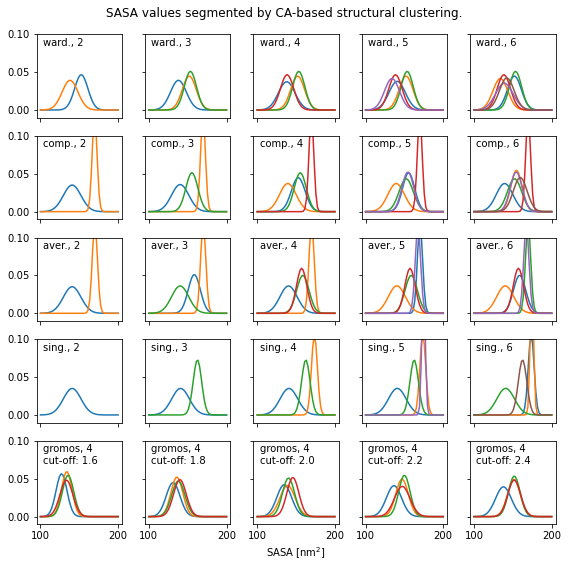

In [32]:
fig, axes=plt.subplots(figsize=[8,8],nrows=5,ncols=5,sharey=True,sharex=True)

index_data=0
bins = np.linspace(100, 200, 50)

for row_i in [0,1,2,3]:
    for col_j in [0,1,2,3,4]:
        
        try: 
            for i in range(0,np.max(linkage[index_data].labels_)+1):
                (mu,sigma)=norm.fit(feat[:,4][linkage[index_data].labels_==i])
                pred=norm.pdf(bins,mu,sigma)
                axes[row_i,col_j].plot(bins,pred) 
                
            axes[row_i,col_j].text(103,0.085,str(pairs[index_data][0][:4])+"., "+str(pairs[index_data][1]) )
            axes[row_i,col_j].set_ylim(-0.0075,0.10)
                
        except KeyError: 
            continue
            
        index_data+=1
        
        
###

index_data=0
cutoffs=[1.6,1.8,2.0,2.2,2.4]

row_i=4
for col_j in [0,1,2,3,4]:
    cl=af.read_cluster_file(np.round(cutoffs[index_data],2))
        
    for clus_k in [1,2,3,4]:
        bins = np.linspace(100, 200, 50)
            
        try: 
            (mu,sigma)=norm.fit(feat[:,4][cl[clus_k]])
            pred=norm.pdf(bins,mu,sigma)
            axes[row_i,col_j].plot(bins,pred) 

                
        except KeyError: 
            continue
            
    axes[row_i,col_j].text(103,0.085,"gromos, 4 ")
    axes[row_i,col_j].text(103,0.070,"cut-off: "+str(cutoffs[index_data]))
    axes[row_i,col_j].set_ylim(-0.01,0.10)
    
    index_data+=1
        
###
        
axes[4,2].set_xlabel(r"SASA [nm$^2$]")        
plt.suptitle("SASA values segmented by CA-based structural clustering.") 
fig.tight_layout()
plt.show()

CCS values with respect to the CA-clustering

/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning

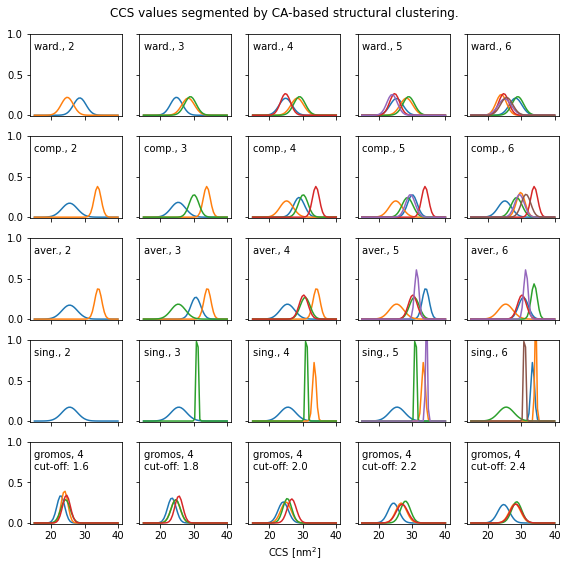

In [37]:
fig, axes=plt.subplots(figsize=[8,8],nrows=5,ncols=5,sharey=True,sharex=True)

index_data=0
bins = np.linspace(15, 40, 50)

for row_i in [0,1,2,3]:
    for col_j in [0,1,2,3,4]:
        
        try: 
            for i in range(0,np.max(linkage[index_data].labels_)+1):
                (mu,sigma)=norm.fit(CCS[linkage[index_data].labels_==i])
                pred=norm.pdf(bins,mu,sigma)
                axes[row_i,col_j].plot(bins,pred) 
                
            axes[row_i,col_j].text(15,0.8,str(pairs[index_data][0][:4])+"., "+str(pairs[index_data][1]) )
            axes[row_i,col_j].set_ylim(-0.015,1)
                
        except KeyError: 
            continue
            
        index_data+=1
        
        
###

index_data=0
cutoffs=[1.6,1.8,2.0,2.2,2.4]

row_i=4
for col_j in [0,1,2,3,4]:
    cl=af.read_cluster_file(np.round(cutoffs[index_data],2))
        
    for clus_k in [1,2,3,4]:
        bins = np.linspace(15, 40, 50)
            
        try: 
            (mu,sigma)=norm.fit(CCS[cl[clus_k]])
            pred=norm.pdf(bins,mu,sigma)
            axes[row_i,col_j].plot(bins,pred) 

                
        except KeyError: 
            continue
            
    axes[row_i,col_j].text(15,0.8,"gromos, 4 ")
    axes[row_i,col_j].text(15,0.65,"cut-off: "+str(cutoffs[index_data]))
    axes[row_i,col_j].set_ylim(-0.015,1)
    
    index_data+=1
        
###
        
axes[4,2].set_xlabel(r"CCS [nm$^2$]")        
plt.suptitle("CCS values segmented by CA-based structural clustering.") 
fig.tight_layout()
plt.show()

## Feature clustering

In [9]:
cl_SASA=[]
cl_CCS=[]

In [10]:
for data in pairs:
    cl_SASA.append(AgglomerativeClustering(linkage=data[0],n_clusters=data[1]).fit(sasa.reshape(-1, 1)))
    cl_CCS.append(AgglomerativeClustering(linkage=data[0],n_clusters=data[1]).fit(CCS.reshape(-1, 1)))

In [11]:
# Populations in the linkage hierarchical clusterings
for i in range(0,50):
    af.print_data(cluster_data=cl_SASA[i],cluster_type='linkage',
                  ordering=range(0,cl_SASA[i].n_clusters))

Cl: Pop
 0: 61.14%
 1: 38.86%
Cl: Pop
 0: 38.86%
 1: 43.66%
 2: 17.48%
Cl: Pop
 0: 43.66%
 1: 14.66%
 2: 17.48%
 3: 24.20%
Cl: Pop
 0: 17.48%
 1: 14.66%
 2: 25.56%
 3: 24.20%
 4: 18.10%
Cl: Pop
 0: 14.66%
 1: 24.20%
 2: 25.56%
 3: 14.19%
 4: 18.10%
 5: 3.28%
Cl: Pop
 0: 66.35%
 1: 33.65%
Cl: Pop
 0: 33.65%
 1: 62.72%
 2: 3.62%
Cl: Pop
 0: 62.72%
 1: 32.16%
 2: 3.62%
 3: 1.49%
Cl: Pop
 0: 32.16%
 1: 1.49%
 2: 3.62%
 3: 41.50%
 4: 21.22%
Cl: Pop
 0: 3.62%
 1: 1.49%
 2: 26.49%
 3: 41.50%
 4: 21.22%
 5: 5.67%
Cl: Pop
 0: 99.58%
 1: 0.42%
Cl: Pop
 0: 6.47%
 1: 0.42%
 2: 93.11%
Cl: Pop
 0: 93.11%
 1: 0.42%
 2: 6.45%
 3: 0.01%
Cl: Pop
 0: 42.08%
 1: 51.03%
 2: 6.45%
 3: 0.01%
 4: 0.42%
Cl: Pop
 0: 51.03%
 1: 10.15%
 2: 6.45%
 3: 0.01%
 4: 0.42%
 5: 31.93%
Cl: Pop
 0: 99.99%
 1: 0.01%
Cl: Pop
 0: 99.96%
 1: 0.01%
 2: 0.03%
Cl: Pop
 0: 99.89%
 1: 0.07%
 2: 0.03%
 3: 0.01%
Cl: Pop
 0: 0.03%
 1: 99.74%
 2: 0.15%
 3: 0.01%
 4: 0.07%
Cl: Pop
 0: 99.74%
 1: 0.07%
 2: 0.15%
 3: 0.01%
 4: 0.01%
 5: 0.

IndexError: list index out of range

In [56]:
# Populations in the linkage hierarchical clusterings
for i in range(0,50):
    af.print_data(cluster_data=cl_SASA[i],cluster_type='linkage',
                  ordering=range(0,cl_SASA[i].n_clusters))

Cl: Pop
 0: 47.91%
 1: 52.09%
Cl: Pop
 0: 52.09%
 1: 37.11%
 2: 10.80%
Cl: Pop
 0: 37.11%
 1: 39.70%
 2: 10.80%
 3: 12.39%
Cl: Pop
 0: 39.70%
 1: 12.39%
 2: 10.80%
 3: 18.10%
 4: 19.01%
Cl: Pop
 0: 10.80%
 1: 12.39%
 2: 23.00%
 3: 18.10%
 4: 19.01%
 5: 16.70%
Cl: Pop
 0: 65.49%
 1: 34.51%
Cl: Pop
 0: 34.51%
 1: 13.20%
 2: 52.29%
Cl: Pop
 0: 13.20%
 1: 4.64%
 2: 52.29%
 3: 29.88%
Cl: Pop
 0: 52.29%
 1: 4.64%
 2: 12.77%
 3: 29.88%
 4: 0.42%
Cl: Pop
 0: 12.77%
 1: 4.64%
 2: 27.65%
 3: 29.88%
 4: 0.42%
 5: 24.64%
Cl: Pop
 0: 76.75%
 1: 23.25%
Cl: Pop
 0: 23.25%
 1: 19.98%
 2: 56.78%
Cl: Pop
 0: 2.26%
 1: 19.98%
 2: 56.78%
 3: 20.99%
Cl: Pop
 0: 19.98%
 1: 20.99%
 2: 56.78%
 3: 2.24%
 4: 0.01%
Cl: Pop
 0: 56.78%
 1: 20.99%
 2: 18.10%
 3: 2.24%
 4: 0.01%
 5: 1.87%
Cl: Pop
 0: 99.99%
 1: 0.01%
Cl: Pop
 0: 99.96%
 1: 0.01%
 2: 0.03%
Cl: Pop
 0: 99.93%
 1: 0.03%
 2: 0.03%
 3: 0.01%
Cl: Pop
 0: 99.86%
 1: 0.03%
 2: 0.03%
 3: 0.01%
 4: 0.07%
Cl: Pop
 0: 99.78%
 1: 0.03%
 2: 0.08%
 3: 0.01%
 4: 0.

IndexError: list index out of range

### features MS clustering

In [156]:
scaler=StandardScaler()
X=scaler.fit_transform(np.vstack((sasa,feat[:,0],feat[:,3])).T)
#X=scaler.fit_transform(feat[:,[0,3,4]])

In [ ]:
use old version.... add a part on the methods. 

add 2 parts: the new results. 
    
    
    
take the text and the structure of the figure. replace every value: 
    small method on the paragraph.
    
    supplementary table. 

In [4]:
scaler=StandardScaler()
X=scaler.fit_transform(np.vstack((sasa,CCS)).T)

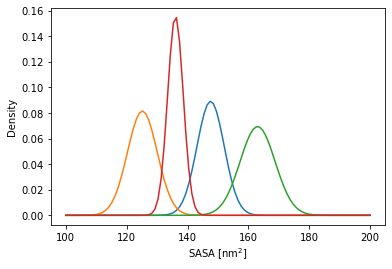

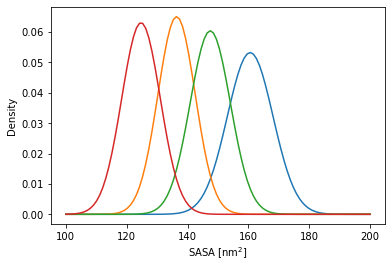

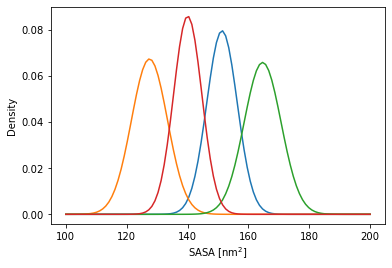

Cl:     Feat1       Feat2       Pop
 1: 125.16±4.89, 22.56±0.98, 14.66%
 3: 136.03±2.56, 24.16±0.89, 24.20%
 0: 147.58±4.47, 25.97±1.34, 43.66%
 2: 163.01±5.75, 28.92±1.67, 17.48%
Cl:     Feat1       Feat2       Pop
 3: 124.71±6.33, 21.94±0.64, 9.54%
 1: 136.40±6.13, 23.92±0.58, 32.82%
 2: 147.47±6.61, 26.03±0.76, 38.36%
 0: 160.58±7.49, 29.17±1.33, 19.28%
Cl:     Feat1       Feat2       Pop
 1: 127.49±5.92, 22.65±0.87, 19.61%
 3: 140.06±4.64, 24.60±0.67, 36.37%
 0: 151.33±5.01, 26.82±0.94, 31.72%
 2: 164.66±6.06, 29.72±1.34, 12.29%


In [15]:
cl_SASA1=AgglomerativeClustering(linkage='ward',n_clusters=4).fit(X[:,0].reshape(-1, 1))
cl_CCS=AgglomerativeClustering(linkage='ward',n_clusters=4).fit(X[:,1].reshape(-1, 1))
cl_both=AgglomerativeClustering(linkage='ward',n_clusters=4).fit(X)

for i in [0,1,2,3]:
    bins = np.linspace(100, 200, 100)
    (mu,sigma)=norm.fit(sasa[cl_SASA1.labels_==i])
    pred=norm.pdf(bins,mu,sigma)
    plt.plot(bins,pred)
plt.xlabel(r"SASA [nm$^2$]")
plt.ylabel(r"Density")
plt.show()

for i in [0,1,2,3]:
    bins = np.linspace(100, 200, 100)
    (mu,sigma)=norm.fit(sasa[cl_CCS.labels_==i])
    pred=norm.pdf(bins,mu,sigma)
    plt.plot(bins,pred)
plt.xlabel(r"SASA [nm$^2$]")
plt.ylabel(r"Density")
plt.show()
    
for i in [0,1,2,3]:
    bins = np.linspace(100, 200, 100)
    (mu,sigma)=norm.fit(sasa[cl_both.labels_==i])
    pred=norm.pdf(bins,mu,sigma)
    plt.plot(bins,pred)
plt.xlabel(r"SASA [nm$^2$]")
plt.ylabel(r"Density")
plt.show()

af.print_data(cluster_data=cl_SASA1,cluster_type='linkage',feat1=sasa,feat2=CCS,ordering=[1,3,0,2])

af.print_data(cluster_data=cl_CCS,cluster_type='linkage',feat1=sasa,feat2=CCS,ordering=[3,1,2,0])

af.print_data(cluster_data=cl_both,cluster_type='linkage',feat1=sasa,feat2=CCS,ordering=[1,3,0,2])

#### Quality of clustering

In [5]:
zs,knees,CHs,Ss,=[],[],[],[]

for i in range(10):
    embeddings=X    #with all features it fits to four also
    
    z = hac.linkage(embeddings, method="ward")
    knee = np.diff(z[::-1, 2], 2)
    num_clust1 = knee.argmax() + 2

    CH=[]
    S=[]
    for i in range(2,10):
        agg_ward = AgglomerativeClustering(linkage ='ward', n_clusters=i).fit(embeddings)
        labels_ward = agg_ward.labels_
        CH.append(metrics.calinski_harabasz_score(embeddings,labels_ward))
        S.append(metrics.silhouette_score(embeddings,labels_ward))
        
    zs.append(z[::-1, 2][1:9])
    knees.append(knee[:8])
    CHs.append(CH)
    Ss.append(S)
    
zs=np.array(zs)
knees=np.array(knees)
CHs=np.array(CHs)
Ss=np.array(Ss)

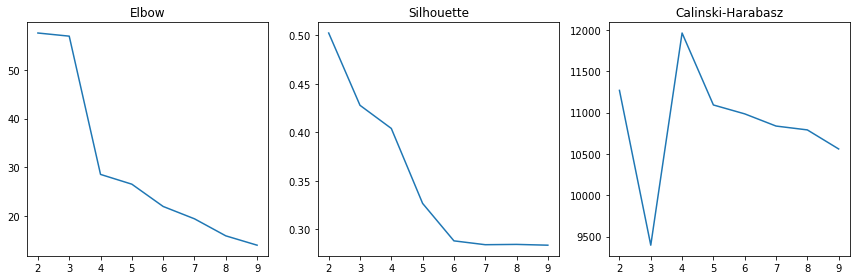

In [6]:
# Average

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=False, sharey=False)

axes[0].plot(range(2,10), np.mean(zs,axis=0),)
#sns.lineplot(x=range(2,10), y=3*np.mean(knees,axis=0), alpha=0.5, style=True, dashes=[(2,2)], ax=axes[0],)

axes[1].plot(range(2,10), np.mean(Ss,axis=0),  )  
axes[2].plot(range(2,10), np.mean(CHs,axis=0),)  

axes[0].set_title("Elbow")
axes[1].set_title("Silhouette")
axes[2].set_title("Calinski-Harabasz")

fig.tight_layout()

#### Bootstrapping

In [16]:
c0,c1,c2,c3,SASAs=[],[],[],[],[]
for i in range(10):
    sampling_idx=np.random.randint(X.shape[0], size=len(X))
    X_samp=X[sampling_idx,:]
    cluster = AgglomerativeClustering(n_clusters=4,linkage="ward").fit(X_samp)
    labels_1=cluster.labels_

    pops,SASA=[],[]
    for i in [0,1,2,3]:
        pops.append(round(100*sum(labels_1==i)/len(labels_1),2))
        SASA.append(np.mean(sasa[sampling_idx][labels_1==i]))

    pops=np.array(pops)
    SASA=np.array(SASA)

    c0.append(pops[np.argsort(SASA)][0])
    c1.append(pops[np.argsort(SASA)][1])
    c2.append(pops[np.argsort(SASA)][2])
    c3.append(pops[np.argsort(SASA)][3])
    SASAs.append(SASA[np.argsort(SASA)])

In [20]:
print('Population values:\n',
      str(np.round(np.mean(c0),0))+"±"+str(np.round(np.std(c0),0)),'\n',
      str(np.round(np.mean(c1),0))+"±"+str(np.round(np.std(c1),0)),'\n',
      str(np.round(np.mean(c2),0))+"±"+str(np.round(np.std(c2),0)),'\n',
      str(np.round(np.mean(c3),0))+"±"+str(np.round(np.std(c3),0)),'\n',
      )

Population values:
 16.0±5.0 
 33.0±9.0 
 33.0±10.0 
 17.0±6.0 



In [ ]:

 15.87±5.07 
 33.35±9.39 
 33.35±9.77 
 17.43±6.13 

### features for the smFS clustering

In [4]:
scaler=StandardScaler()
# features: ["EE","HB","HC","RG","SA","SB"]
X=scaler.fit_transform(feat[:,[1,2,5]])

clusters = range(2,7)
linkage_type = ['ward', 'complete', 'average', 'single']
pairs = list(product(linkage_type,clusters))

In [5]:
cl_HB=[]
cl_HC=[]
cl_SB=[]

for data in pairs:
    cl_HB.append(AgglomerativeClustering(linkage=data[0],n_clusters=data[1]).fit(X[:,0].reshape(-1, 1)))
    cl_HC.append(AgglomerativeClustering(linkage=data[0],n_clusters=data[1]).fit(X[:,1].reshape(-1, 1)))
    cl_SB.append(AgglomerativeClustering(linkage=data[0],n_clusters=data[1]).fit(X[:,2].reshape(-1, 1)))

In [6]:
af.print_data(cluster_data=cl_HB[1],cluster_type='linkage',feat1=sasa,ordering=[2,0,1])
af.print_data(cluster_data=cl_HC[1],cluster_type='linkage',feat1=sasa,ordering=[1,0,2])
af.print_data(cluster_data=cl_SB[1],cluster_type='linkage',feat1=sasa,ordering=[0,2,1])

Cl:     Feat1    Pop
 2: 128.81±8.10, 10.61%
 0: 140.98±9.11, 58.01%
 1: 155.34±9.87, 31.38%
Cl:     Feat1    Pop
 1: 130.77±8.17, 19.43%
 0: 142.96±9.17, 50.68%
 2: 155.01±9.92, 29.89%
Cl:     Feat1    Pop
 0: 138.40±11.06, 37.13%
 2: 151.50±12.11, 22.81%
 1: 145.40±11.36, 40.07%


In [7]:
cl_HB_HC=[]
cl_HB_SB=[]
cl_HC_SB=[]

for data in pairs:
    cl_HB_HC.append(AgglomerativeClustering(linkage=data[0],n_clusters=data[1]).fit(X[:,[0,1]]))
    cl_HB_SB.append(AgglomerativeClustering(linkage=data[0],n_clusters=data[1]).fit(X[:,[0,2]]))
    cl_HC_SB.append(AgglomerativeClustering(linkage=data[0],n_clusters=data[1]).fit(X[:,[1,2]]))

In [8]:
af.print_data(cluster_data=cl_HB_HC[1],cluster_type='linkage',feat1=sasa,ordering=[1,0,2])
af.print_data(cluster_data=cl_HB_SB[1],cluster_type='linkage',feat1=sasa,ordering=[2,0,1])
af.print_data(cluster_data=cl_HC_SB[1],cluster_type='linkage',feat1=sasa,ordering=[2,0,1])

Cl:     Feat1    Pop
 1: 132.25±8.25, 29.03%
 0: 145.45±8.25, 53.55%
 2: 160.26±8.42, 17.42%
Cl:     Feat1    Pop
 2: 135.19±9.86, 16.67%
 0: 150.49±11.02, 53.30%
 1: 138.02±9.78, 30.03%
Cl:     Feat1    Pop
 2: 156.07±10.03, 22.90%
 0: 137.33±10.34, 41.54%
 1: 144.57±10.11, 35.55%


In [9]:
cl_HB_HC_SB=[]
for data in pairs:
    cl_HB_HC_SB.append(AgglomerativeClustering(linkage=data[0],n_clusters=data[1]).fit(X))

In [10]:
af.print_data(cluster_data=cl_HB_HC_SB[1],cluster_type='linkage',feat1=sasa,ordering=[1,2,0])

Cl:     Feat1    Pop
 1: 132.75±8.39, 30.67%
 2: 142.85±7.70, 29.07%
 0: 153.89±9.76, 40.26%


#### Quality of clustering

In [11]:
zs,knees,CHs,Ss,=[],[],[],[]

for i in range(10):
    embeddings=X     #with all features it fits to four also
    
    z = hac.linkage(embeddings, method="ward")
    knee = np.diff(z[::-1, 2], 2)
    num_clust1 = knee.argmax() + 2

    CH=[]
    S=[]
    for i in range(2,10):
        agg_ward = AgglomerativeClustering(linkage ='ward', n_clusters=i).fit(embeddings)
        labels_ward = agg_ward.labels_
        CH.append(metrics.calinski_harabasz_score(embeddings,labels_ward))
        S.append(metrics.silhouette_score(embeddings,labels_ward))
        
    zs.append(z[::-1, 2][1:9])
    knees.append(knee[:8])
    CHs.append(CH)
    Ss.append(S)
    
zs=np.array(zs)
knees=np.array(knees)
CHs=np.array(CHs)
Ss=np.array(Ss)

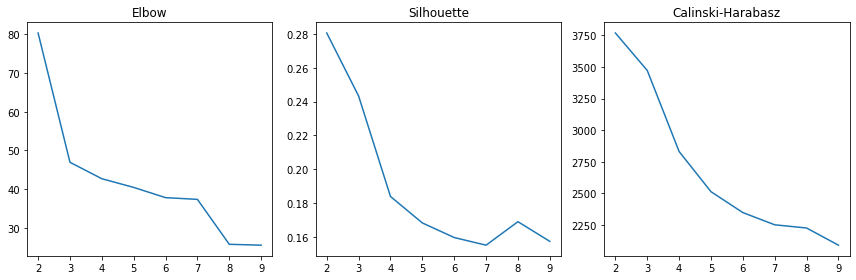

In [12]:
# Average

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=False, sharey=False)

axes[0].plot(range(2,10), np.mean(zs,axis=0),)
#sns.lineplot(x=range(2,10), y=3*np.mean(knees,axis=0), alpha=0.5, style=True, dashes=[(2,2)], ax=axes[0],)

axes[1].plot(range(2,10), np.mean(Ss,axis=0),  )  
axes[2].plot(range(2,10), np.mean(CHs,axis=0),)  

axes[0].set_title("Elbow")
axes[1].set_title("Silhouette")
axes[2].set_title("Calinski-Harabasz")

fig.tight_layout()

#### Bootstraping

In [116]:
c0,c1,c2,SASAs=[],[],[],[]
for i in range(15):
    sampling_idx=np.random.randint(X.shape[0], size=int(0.99*len(X)))
    # features: ["HB","HC","SB"]
    X_samp=X[sampling_idx][:,[0,1,2]]
    cluster = AgglomerativeClustering(n_clusters=3,linkage="ward").fit(X_samp)
    labels_1=cluster.labels_

    pops,SASA=[],[]
    for i in [0,1,2]:
        pops.append(round(100*sum(labels_1==i)/len(labels_1),2))
        SASA.append(np.mean(sasa[sampling_idx][labels_1==i]))

    pops=np.array(pops)
    SASA=np.array(SASA)

    c0.append(pops[np.argsort(SASA)][0])
    c1.append(pops[np.argsort(SASA)][1])
    c2.append(pops[np.argsort(SASA)][2])
    SASAs.append(SASA[np.argsort(SASA)])

In [117]:
print('\n',
      str(np.round(np.mean(c0),0))+"±"+str(np.round(np.std(c0),0)),'\n',
      str(np.round(np.mean(c1),0))+"±"+str(np.round(np.std(c1),0)),'\n',
      str(np.round(np.mean(c2),0))+"±"+str(np.round(np.std(c2),0)),'\n',
      )


 26.0±6.0 
 29.0±13.0 
 45.0±8.0 



Text(0, 0.5, 'Density')

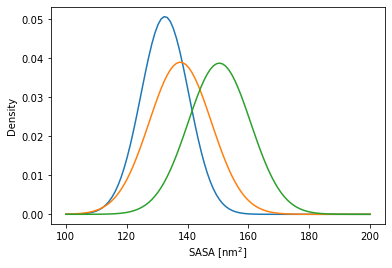

In [231]:
for i in [2,1,0]:
    bins = np.linspace(100, 200, 100)
    (mu,sigma)=norm.fit(sasa[cl_HB_HC_SB[1].labels_==i])
    pred=norm.pdf(bins,mu,sigma)
    plt.plot(bins,pred) 
    
plt.xlabel(r"SASA [nm$^2$]")
plt.ylabel(r"Density")

# MS analysis

In [77]:
scaler=StandardScaler()
X=scaler.fit_transform(np.vstack((sasa,CCS)).T)
cluster=AgglomerativeClustering(linkage='ward',n_clusters=4).fit(X)

In [78]:
af.print_data(cluster_data=cluster,cluster_type='linkage',
              feat1=sasa,ordering=[3,0,1,2])

Cl:     Feat1    Pop
 3: 125.29±4.98, 14.84%
 0: 139.63±4.93, 42.27%
 1: 151.56±5.05, 31.42%
 2: 165.30±5.76, 11.47%


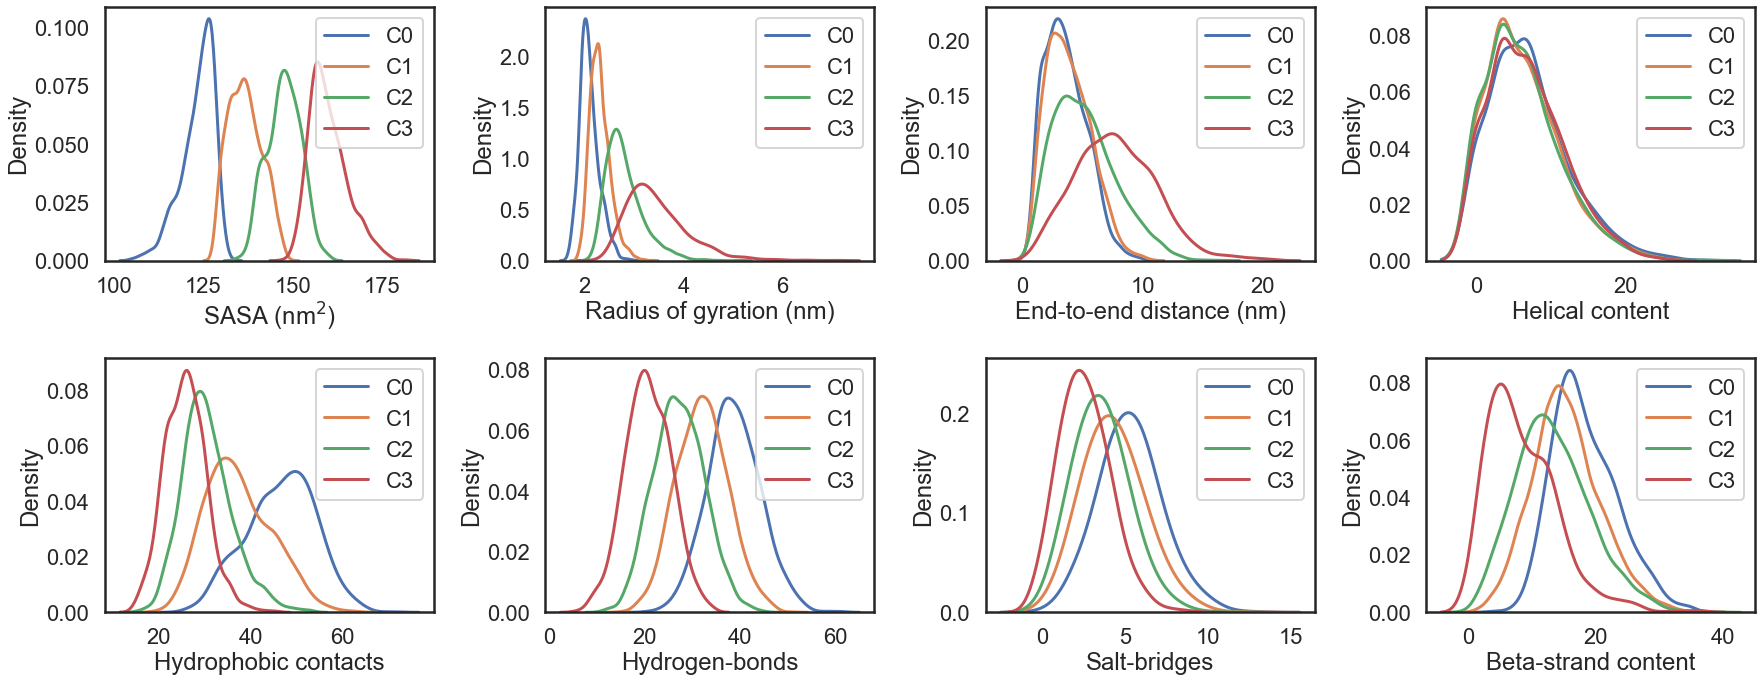

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10), sharex=False, sharey=False)
sns.set(style='white',context='poster',font_scale=1.0)
j=0
for i in [3,0,1,2]:
    mask=((cluster.labels_== i))
    
    sns.kdeplot(feat[:,4][mask], ax=axes[0,0], label="C"+str(j),)
    sns.kdeplot(feat[:,3][mask], ax=axes[0,1], label="C"+str(j),)
    sns.kdeplot(feat[:,0][mask], ax=axes[0,2], label="C"+str(j),)

    sns.kdeplot(feat[:,2][mask], ax=axes[1,0], label="C"+str(j), )
    sns.kdeplot(feat[:,1][mask], ax=axes[1,1], label="C"+str(j), )
    sns.kdeplot(feat[:,5][mask], ax=axes[1,2], label="C"+str(j), bw_method=0.45)

  #  sns.kdeplot(secondary.Coil[::][mask], ax=axes[2,0], label="M"+str(j), )
    sns.kdeplot(SS[:,[7,8,9]][mask].sum(axis=1), ax=axes[0,3], label="C"+str(j) ,  bw_method=0.30)
    sns.kdeplot(SS[:,[3,4]][mask].sum(axis=1), ax=axes[1,3], label="C"+str(j), )
    
    #sns.kdeplot(secondary['Turn'][::][mask], ax=axes[2,2], label="C"+str(j), )

    j+=1
    
#for ax in axes:
#    ax.set_ylabel(r'Density estimation')    

axes[0,0].set_xlabel(r'SASA (nm$^2$)')
axes[0,1].set_xlabel(r'Radius of gyration (nm)')
axes[0,2].set_xlabel(r'End-to-end distance (nm)')

axes[1,0].set_xlabel(r'Hydrophobic contacts')
axes[1,1].set_xlabel(r'Hydrogen-bonds')
axes[1,2].set_xlabel(r'Salt-bridges')

#axes[2,0].set_xlabel(r'Irregular cont.')
axes[0,3].set_xlabel(r'Helical content')
axes[1,3].set_xlabel(r'Beta-strand content')
#axes[2,2].set_xlabel(r'α-helix turn cont.')
    
for ax in axes.flatten():
    ax.legend(loc=1)  

fig.tight_layout()

#fig.suptitle("D. E. Shaw ensemble",x=0.5,y=1.015)

#plt.savefig("distribution1.pdf",dpi=300)

plt.show()


## Getting indexes from the diverse clusters

In [8]:
gg=np.array(range(1,7314))

k=0
for j in [3,0,1,2]:
    arf=gg[(cluster.labels_==j)]

    print("[ Cluster "+str(k)+" ]")
    for i in range(round(len(arf)/20)+1):
        print(*arf[(20*i):20*(i+1)],sep=" ")   
    k+=1

[ Cluster 0 ]
48 91 106 107 112 649 997 1120 1187 1188 1189 1190 1191 1192 1193 1195 1197 1198 1199 1200
1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1215 1225 1227 1228 1230 1233 1237 1238
1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258
1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278
1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298
1299 1300 1301 1302 1303 1305 1306 1309 1310 1311 1312 1314 1315 1316 1317 1318 1319 1320 1321 1322
1323 1326 1327 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1342 1345 1346 1347 1349 1351
1352 1353 1354 1355 1356 1357 1361 1362 1363 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376
1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396
1397 1398 1399 1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1416 1417 1421 

2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011 3012 3013 3014 3015 3016 3017
3018 3019 3020 3021 3022 3023 3024 3025 3026 3028 3029 3030 3032 3033 3034 3035 3036 3037 3038 3039
3041 3042 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053 3054 3055 3056 3059 3062 3063 3064 3065
3066 3068 3069 3070 3071 3072 3073 3075 3076 3078 3079 3080 3081 3082 3083 3084 3085 3086 3087 3088
3089 3090 3091 3092 3094 3095 3096 3097 3098 3099 3100 3101 3103 3104 3105 3106 3107 3109 3110 3111
3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123 3124 3125 3126 3127 3128 3129 3130 3131
3132 3134 3135 3136 3137 3138 3139 3146 3149 3160 3161 3162 3163 3164 3167 3168 3169 3170 3171 3172
3173 3174 3175 3177 3178 3179 3180 3181 3182 3183 3184 3185 3186 3187 3188 3189 3190 3191 3192 3193
3194 3195 3202 3221 3222 3223 3224 3225 3226 3228 3229 3230 3231 3237 3239 3240 3241 3242 3244 3245
3249 3251 3252 3253 3276 3277 3299 3300 3304 3320 3330 3331 3332 3337 3338 3339 3340 3341 3342 3343


648 664 665 666 667 668 669 672 680 684 685 686 687 689 690 691 692 694 695 696
697 698 704 706 708 709 711 713 715 717 719 720 721 722 723 724 725 726 727 728
729 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749
750 751 752 753 754 755 756 757 758 759 760 761 763 764 765 766 767 768 769 770
771 772 773 775 776 777 778 779 780 781 782 783 784 785 787 788 820 821 826 837
839 844 845 847 851 852 853 854 855 856 857 858 859 860 862 867 875 876 877 878
884 885 886 887 888 893 894 895 896 897 899 900 901 902 903 904 905 906 907 908
910 911 912 914 916 917 918 922 926 930 931 933 934 935 937 938 939 940 941 942
943 944 946 947 951 952 953 954 955 956 957 958 959 960 961 962 963 965 966 967
969 970 971 972 973 974 989 1006 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025
1032 1040 1043 1044 1045 1046 1047 1048 1049 1051 1053 1054 1056 1057 1058 1059 1060 1061 1064 1065
1066 1067 1068 1069 1070 1082 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 10

4280 4281 4285 4286 4287 4305 4306 4307 4308 4309 4310 4311 4319 4320 4321 4322 4323 4324 4325 4326
4343 4344 4345 4447 4500 4501 4504 4505 4509 4511 4513 4521 4522 4526 4532 4534 4535 4536 4537 4538
4539 4540 4541 4542 4543 4545 4550 4570 4635 4636 4637 4638 4639 4640 4641 4642 4643 4658 4659 4660
4677 4689 4690 4691 4692 4693 4694 4697 4698 4701 4702 4705 4706 4707 4709 4721 4722 4726 4786 4790
4791 4792 4793 4794 4795 4796 4797 4798 4800 4802 4811 4819 4829 4836 4839 4840 4842 4843 4844 4853
4859 4860 4862 4863 4864 4866 4867 4868 4869 4870 4871 4872 4873 4874 4875 4876 4877 4878 4879 4880
4881 4882 4886 4887 4888 4889 4890 4891 4896 4897 4898 4899 4900 4901 4902 4903 4904 4909 4910 4911
4912 4913 4914 4915 4916 4917 4918 4919 4920 4921 4922 4923 4925 4927 4930 4931 4932 4934 4935 4936
4937 4938 4939 4940 4941 4942 4945 4985 4986 4988 4989 4990 5002 5003 5004 5005 5006 5007 5008 5009
5010 5011 5012 5013 5014 5015 5019 5020 5022 5023 5024 5025 5026 5027 5028 5029 5030 5031 5032 5033


## Function definitions and so:

In [25]:
region={'MET1': ['Nte'],
'ASP2': ['Nte'],
'VAL3': ['Nte'],
'PHE4': ['Nte'],
'MET5': ['Nte'],
'LYS6': ['Nte'],
'GLY7': ['Nte'],
'LEU8': ['Nte'],
'SER9': ['Nte'],
'LYS10': ['Nte'],
'ALA11': ['Nte'],
'LYS12': ['Nte'],
'GLU13': ['Nte'],
'GLY14': ['Nte'],
'VAL15': ['Nte'],
'VAL16': ['Nte'],
'ALA17': ['Nte'],
'ALA18': ['Nte'],
'ALA19': ['Nte'],
'GLU20': ['Nte'],
'LYS21': ['Nte'],
'THR22': ['Nte'],
'LYS23': ['Nte'],
'GLN24': ['Nte'],
'GLY25': ['Nte'],
'VAL26': ['Nte'],
'ALA27': ['Nte'],
'GLU28': ['Nte'],
'ALA29': ['Nte'],
'ALA30': ['Nte'],
'GLY31': ['Nte'],
'LYS32': ['Nte'],
'THR33': ['Nte'],
'LYS34': ['Nte'],
'GLU35': ['Nte'],
'GLY36': ['Nte'],
'VAL37': ['Nte'],
'LEU38': ['Nte'],
'TYR39': ['Nte'],
'VAL40': ['Nte'],
'GLY41': ['Nte'],
'SER42': ['Nte'],
'LYS43': ['Nte'],
'THR44': ['Nte'],
'LYS45': ['Nte'],
'GLU46': ['Nte'],
'GLY47': ['Nte'],
'VAL48': ['Nte'],
'VAL49': ['Nte'],
'HIS50': ['Nte'],
'GLY51': ['Nte'],
'VAL52': ['Nte'],
'ALA53': ['Nte'],
'THR54': ['Nte'],
'VAL55': ['Nte'],
'ALA56': ['Nte'],
'GLU57': ['Nte'],
'LYS58': ['Nte'],
'THR59': ['Nte'],
'LYS60': ['Nte'],
'GLU61': ['NAC'],
'GLN62': ['NAC'],
'VAL63': ['NAC'],
'THR64': ['NAC'],
'ASN65': ['NAC'],
'VAL66': ['NAC'],
'GLY67': ['NAC'],
'GLY68': ['NAC'],
'ALA69': ['NAC'],
'VAL70': ['NAC'],
'VAL71': ['NAC'],
'THR72': ['NAC'],
'GLY73': ['NAC'],
'VAL74': ['NAC'],
'THR75': ['NAC'],
'ALA76': ['NAC'],
'VAL77': ['NAC'],
'ALA78': ['NAC'],
'GLN79': ['NAC'],
'LYS80': ['NAC'],
'THR81': ['NAC'],
'VAL82': ['NAC'],
'GLU83': ['NAC'],
'GLY84': ['NAC'],
'ALA85': ['NAC'],
'GLY86': ['NAC'],
'SER87': ['NAC'],
'ILE88': ['NAC'],
'ALA89': ['NAC'],
'ALA90': ['NAC'],
'ALA91': ['NAC'],
'THR92': ['NAC'],
'GLY93': ['NAC'],
'PHE94': ['NAC'],
'VAL95': ['NAC'],
'LYS96': ['Cte'],
'LYS97': ['Cte'],
'ASP98': ['Cte'],
'GLN99': ['Cte'],
'LEU100': ['Cte'],
'GLY101': ['Cte'],
'LYS102': ['Cte'],
'ASN103': ['Cte'],
'GLU104': ['Cte'],
'GLU105': ['Cte'],
'GLY106': ['Cte'],
'ALA107': ['Cte'],
'PRO108': ['Cte'],
'GLN109': ['Cte'],
'GLU110': ['Cte'],
'GLY111': ['Cte'],
'ILE112': ['Cte'],
'LEU113': ['Cte'],
'GLU114': ['Cte'],
'ASP115': ['Cte'],
'MET116': ['Cte'],
'PRO117': ['Cte'],
'VAL118': ['Cte'],
'ASP119': ['Cte'],
'PRO120': ['Cte'],
'ASP121': ['Cte'],
'ASN122': ['Cte'],
'GLU123': ['Cte'],
'ALA124': ['Cte'],
'TYR125': ['Cte'],
'GLU126': ['Cte'],
'MET127': ['Cte'],
'PRO128': ['Cte'],
'SER129': ['Cte'],
'GLU130': ['Cte'],
'GLU131': ['Cte'],
'GLY132': ['Cte'],
'TYR133': ['Cte'],
'GLN134': ['Cte'],
'ASP135': ['Cte'],
'TYR136': ['Cte'],
'GLU137': ['Cte'],
'PRO138': ['Cte'],
'GLU139': ['Cte'],
'ALA140': ['Cte'],}


MaxASA={"ALA":1.29,
"ARG":2.74,
"ASN":1.95,
"ASP":1.93,
"CYS":1.67,
"GLU":2.23,
"GLN":2.25,
"GLY":1.04,
"HIS":2.24,
"ILE":1.97,
"LEU":2.01,
"LYS":2.36,
"MET":2.24,
"PHE":2.40,
"PRO":1.59,
"SER":1.55,
"THR":1.72,
"TRP":2.85,
"TYR":2.63,
"VAL":1.74,}

In [26]:
def return_SASA_data(traj_list=None,topfile=None):
    t=md.load(traj_list,top=topfile)
    blank=md.shrake_rupley(t[::],mode='residue')
    return np.mean(blank,axis=0)

### HB

In [27]:
def return_HB_data(traj_list=None,topfile=None,cutoff=0.41):
    t=md.load(traj_list,top=topfile)

    hbonds = md.baker_hubbard(t,periodic=False,distance_cutoff=cutoff, angle_cutoff=120,freq=0.11)
    da_distances = md.compute_distances(t,hbonds[:, [0,2]], periodic=False)

    HB=[]
    for count, hbond in enumerate(hbonds):
        HB.append([str(t.topology.atom(hbond[0])).split("-")[0]]+\
                  [str(t.topology.atom(hbond[0])).split("-")[1]]+\
                  [str(t.topology.atom(hbond[2])).split("-")[0]]+\
                  [str(t.topology.atom(hbond[2])).split("-")[1]]+\
                  [np.average(da_distances,axis=0)[count]])
    HB=pd.DataFrame(HB,columns=["HBD","Donor","HBA","Acceptor","Dist"])

    HB[1]=HB["HBD"].replace(region)
    HB[2]=HB["HBA"].replace(region)

    HB["Interaction"]=HB[1]+"-"+ HB[2]

    HB["Intra-Domain"]=(HB[1]==HB[2])
    HB=HB[HB["Dist"]<cutoff]
    print(HB["Interaction"].value_counts())

    return pd.concat([HB.HBD,HB.HBA]).astype(str).str[3:].astype(int).value_counts()

In [28]:
def return_HC_data(traj_list=None,topfile=None,traj_cutoff=0.20):
    t=md.load(traj_list,top=topfile)

    # Get numerical indices of the hydrophobic residues
    hydrophobic=["ALA", "LEU", "MET", "VAL", 'PHE', "PRO", "TYR", "ILE", "TRP",]
    table, bonds = t.topology.to_dataframe()
    table["Indices"]=(table.resSeq.astype('category').cat.codes.add(1)-1)
    hydrophobic_res=table.Indices[table.resName.isin(hydrophobic)].unique()

    # Get pairwise distances
    pairs=[comb for comb in combinations(hydrophobic_res, 2)]
    distances,pairs=md.compute_contacts(t, contacts=pairs, scheme='closest-heavy', ignore_nonprotein=True,
                        periodic=True, soft_min=False, soft_min_beta=20)

    # retrieve only distances lower than 0.5 nm, and that are presetn at least at cutoff% of the frames
    indices_HC=(np.mean(distances<0.500,axis=0)>traj_cutoff)

    list0=[]
    for i in pairs[indices_HC][:,0]:
        if i < 52: list0.append("Nte")
        elif i < 77: list0.append("NAC")
        elif i >= 77: list0.append("Cte")

    list1=[]
    for i in pairs[indices_HC][:,1]:
        if i < 52: list1.append("Nte")
        elif i < 77: list1.append("NAC")
        elif i >= 77: list1.append("Cte")

    list2=pd.DataFrame([list0,list1]).T
    list2["Interaction"]=list2[0]+"-"+ list2[1]
    print(list2["Interaction"].value_counts())
    
    resid,counts=np.unique(pairs[indices_HC].flatten(), return_counts=True)
    return pd.DataFrame(counts,resid)

In [29]:
def return_SB_data(traj_list=None,topfile=None):
    t=md.load(traj_list,top=topfile)
    table, bonds = t.topology.to_dataframe()

    #table.resName.unique()
    pos_res=["LYS","HIS","ARG"]
    neg_res=["ASP","GLU"]

    pos_ids=table.resSeq[table['resName'].isin(pos_res)].unique()-1 
    neg_ids=table.resSeq[table['resName'].isin(neg_res)].unique()-1
    # Minus one because table starts sequence on 1, not on 0.

    #Define charged pairs
    SB_pairs=list(product(pos_ids,neg_ids))

    SB=[]
    for res_pair in SB_pairs:
        atoms_idx_A=t.top.select("sidechain and resid "+str(res_pair[0])+" and not element H C")
        atoms_idx_B=t.top.select("sidechain and resid "+str(res_pair[1])+" and not element H C")
        d=md.compute_distances(t, periodic=False,
                               atom_pairs=product(atoms_idx_A,atoms_idx_B))
        d=np.min(d,axis=1)
        SB.append(d)
    
    return np.array(SB).T

## SASA calculations

In [14]:
topfile = 'data/conf.gro'
traj_list = 'data/clusters/MS/Cluster0.xtc'

In [15]:
t=md.load(traj_list,top=topfile)
MaxSASAs=np.array([MaxASA[str(t.top.residue(i))[:3]] for i in range(140)])

In [ ]:
#SASA_0=return_SASA_data(topfile=topfile,traj_list='data/clusters/Cluster0.xtc')
#SASA_1=return_SASA_data(topfile=topfile,traj_list='data/clusters/Cluster1.xtc')
#SASA_2=return_SASA_data(topfile=topfile,traj_list='data/clusters/Cluster2.xtc')
#SASA_3=return_SASA_data(topfile=topfile,traj_list='data/clusters/Cluster3.xtc')

In [16]:
SASA_0=np.mean(sasa_res[cluster.labels_==3],axis=0)
SASA_1=np.mean(sasa_res[cluster.labels_==0],axis=0)
SASA_2=np.mean(sasa_res[cluster.labels_==1],axis=0)
SASA_3=np.mean(sasa_res[cluster.labels_==2],axis=0)

In [30]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

#def moving_average(a, n=3) : return a

Text(103.0, 14, 'C-term')

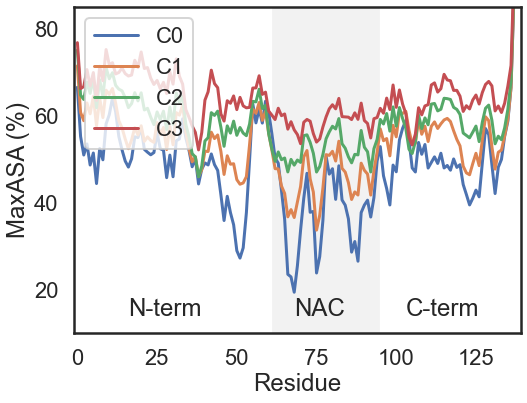

In [22]:
plt.figure(figsize=(8, 6))

plt.plot(100*moving_average(SASA_0/MaxSASAs),label='C0')
plt.plot(100*moving_average(SASA_1/MaxSASAs),label='C1')
plt.plot(100*moving_average(SASA_2/MaxSASAs),label='C2')
plt.plot(100*moving_average(SASA_3/MaxSASAs),label='C3')

plt.axvspan(61, 95, facecolor='grey', alpha=0.1)
plt.xlim(-1,139)
plt.ylim(10,85)
plt.xlabel("Residue")
plt.ylabel("MaxASA (%)")
plt.legend(loc=2)

plt.text(16.0,14,"N-term")
plt.text(68.0,14,"NAC")
plt.text(103.,14,"C-term")



### SASA difference

In [ ]:
SASA_diff=(SASA_2/MaxSASAs)-(SASA_0/MaxSASAs)

In [509]:
[t.top.residue(i) for i in np.argsort(SASA_diff)[:10]]

## Hydrogen bond calculation

In [30]:
!ls

DESRES-ensemble             blank.txt
Rita final-no dim red.ipynb data
__pycache__                 low-res-aSyn.ipynb
auxiliary_functions.py      table_rita.xlsx


In [32]:
!ls data/

CCS_data.txt    clusters        descriptors.dat parrot.pkl      scount.xvg
Cluster_MS.ndx  conf.gro        gromos          sasa_res.pkl    traj_red.xtc


In [25]:
topfile = 'data/conf.gro'
traj_list = 'data/clusters/MS/Cluster0.xtc'

In [58]:
HB_0=return_HB_data(topfile=topfile,traj_list='data/clusters/MS/Cluster0.xtc')
HB_1=return_HB_data(topfile=topfile,traj_list='data/clusters/MS/Cluster1.xtc')
HB_2=return_HB_data(topfile=topfile,traj_list='data/clusters/MS/Cluster2.xtc')
HB_3=return_HB_data(topfile=topfile,traj_list='data/clusters/MS/Cluster3.xtc')

Cte-Cte    8
NAC-NAC    5
Nte-Nte    3
Name: Interaction, dtype: int64
Cte-Cte    4
NAC-NAC    3
Nte-Nte    2
Name: Interaction, dtype: int64
Cte-Cte    4
Nte-Nte    2
NAC-NAC    1
Name: Interaction, dtype: int64
Cte-Cte    2
Nte-Nte    1
Name: Interaction, dtype: int64


In [59]:
HB_Nte=np.array([3, 2,2,1])
HB_NAC=np.array([5, 3,1,0])
HB_Cte=np.array([8,4,4,2])

palette = sns.color_palette(["r","darkorange","g","royalblue",'mediumpurple'])
seq=[0, 1,2,3]

Text(0.5, 1.0, 'Hydrogen bonds')

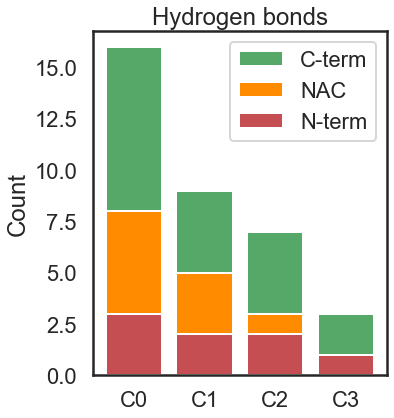

In [60]:
plt.figure(figsize=(6, 6))

plt.bar(x=seq,height=np.array(HB_Nte)+np.array(HB_NAC)+np.array(HB_Cte),color = palette[2],label='C-term')
plt.bar(x=seq,height=np.array(HB_Nte)+np.array(HB_NAC),color = palette[1],label='NAC')
plt.bar(x=seq,height=np.array(HB_Nte),color = palette[0],label='N-term')
plt.xticks(ticks=seq,labels=['C0','C1','C2','C3'])
plt.legend()

plt.ylabel("Count")
plt.legend(loc=1)
plt.tight_layout()

plt.title("Hydrogen bonds")

#plt.savefig("HB_Cs.pdf")


In [187]:
HB=pd.concat([HB_0.rename('C0'),HB_1.rename('C1'),
              HB_2.rename('C2'),HB_3.rename('C3')], axis=1,)

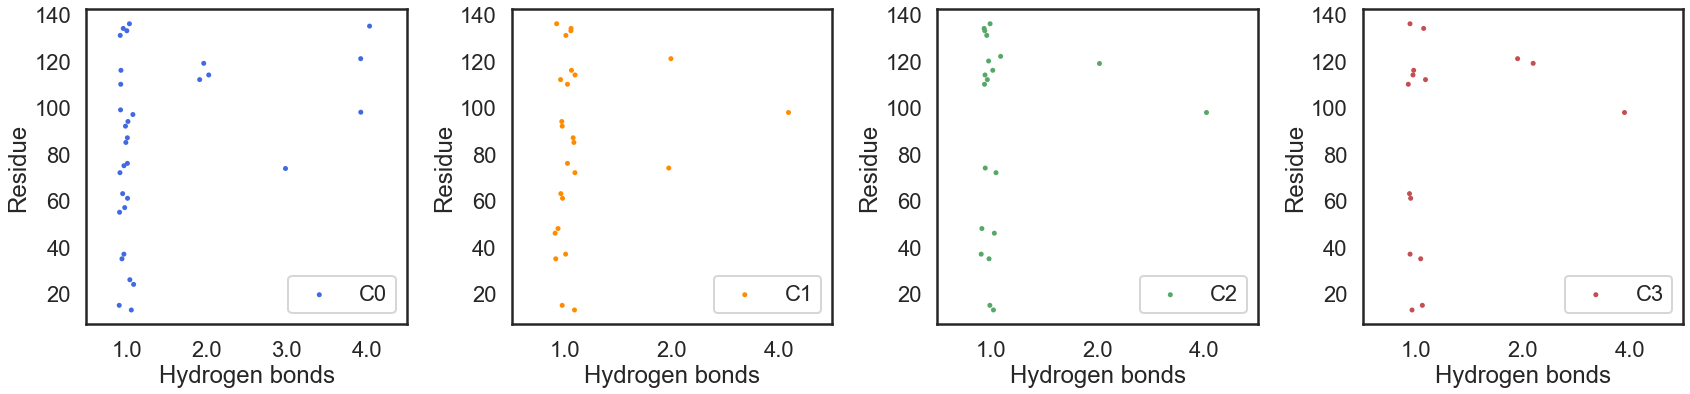

In [238]:
fig, axes = plt.subplots(ncols=4, figsize=(24, 6), sharex=False, sharey=False)
sns.set(style='white',context='poster',font_scale=1.0)
palette = sns.color_palette(["royalblue","darkorange","g","r",'mediumpurple'])
j=0
for i in range(4):
    sns.stripplot(data=HB.sort_index().reset_index(),y='index',x='C'+str(i),ax=axes[i],color=palette[i],label='C'+str(i))
    #sns.stripplot(data=HB.sort_index().reset_index(),y='index',x='C'+str(i+1),ax=axes[i],color=palette[i+1],label='C'+str(i+1))
    axes[i].set_ylabel("Residue")
    axes[i].set_xlabel("Hydrogen bonds")
    axes[i].legend(['C'+str(i)],loc=4)
    j+=1

plt.tight_layout()

## Hydrophobic contact calculation

In [249]:
!ls data

CCS_data.txt    clusters        descriptors.dat parrot.pkl      scount.xvg
Cluster_MS.ndx  conf.gro        gromos          sasa_res.pkl    traj_red.xtc


In [77]:
HC_0=return_HC_data(topfile='data/clusters/conf_side.gro', traj_list='data/clusters/MS/Cluster0_side.xtc')
HC_1=return_HC_data(topfile='data/clusters/conf_side.gro', traj_list='data/clusters/MS/Cluster1_side.xtc')
HC_2=return_HC_data(topfile='data/clusters/conf_side.gro', traj_list='data/clusters/MS/Cluster2_side.xtc')
HC_3=return_HC_data(topfile='data/clusters/conf_side.gro', traj_list='data/clusters/MS/Cluster3_side.xtc')

Cte-Cte    13
NAC-NAC    11
Nte-Nte     9
Nte-NAC     5
NAC-Cte     4
Nte-Cte     2
Name: Interaction, dtype: int64
NAC-NAC    10
Nte-Nte     9
Cte-Cte     9
NAC-Cte     4
Nte-NAC     3
Name: Interaction, dtype: int64
Cte-Cte    8
Nte-Nte    6
NAC-NAC    2
Nte-Cte    1
Name: Interaction, dtype: int64
Nte-Nte    7
Cte-Cte    6
NAC-Cte    1
Name: Interaction, dtype: int64


In [78]:
HC_Nte=np.array([ 9, 9, 6, 7])
HC_NAC=np.array([11,10, 2, 0])
HC_Cte=np.array([13, 9, 8, 6])
HC_Mix=np.array([11, 7, 1, 1])

palette = sns.color_palette(["r","darkorange","g","royalblue",'mediumpurple'])
seq=[0, 1,2,3]

Text(0.5, 1.0, 'Hydrophobic contacts')

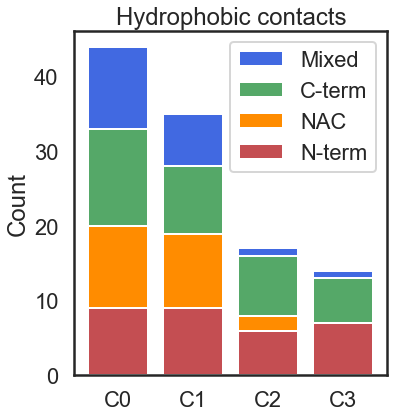

In [79]:
plt.figure(figsize=(6, 6))

plt.bar(x=seq,height=np.array(HC_Nte)+np.array(HC_NAC)+np.array(HC_Cte)+np.array(HC_Mix),color = palette[3],label='Mixed')
plt.bar(x=seq,height=np.array(HC_Nte)+np.array(HC_NAC)+np.array(HC_Cte),color = palette[2],label='C-term')
plt.bar(x=seq,height=np.array(HC_Nte)+np.array(HC_NAC),color = palette[1],label='NAC')
plt.bar(x=seq,height=np.array(HC_Nte),color = palette[0],label='N-term')
plt.xticks(ticks=seq,labels=['C0','C1','C2','C3'])
plt.legend()

plt.ylabel("Count")
plt.legend(loc=1)
plt.tight_layout()

plt.title("Hydrophobic contacts")

#plt.savefig("HB_Cs.pdf")



In [384]:
HC=pd.concat([HC_0,HC_1,HC_2,HC_3], axis=1)
HC.columns=["C0","C1","C2","C3"]

new_index=[int(str(t.topology.residue(i))[3:]) for i in HC.index.to_list()]
HC.index=new_index

HC=HC.sort_index()

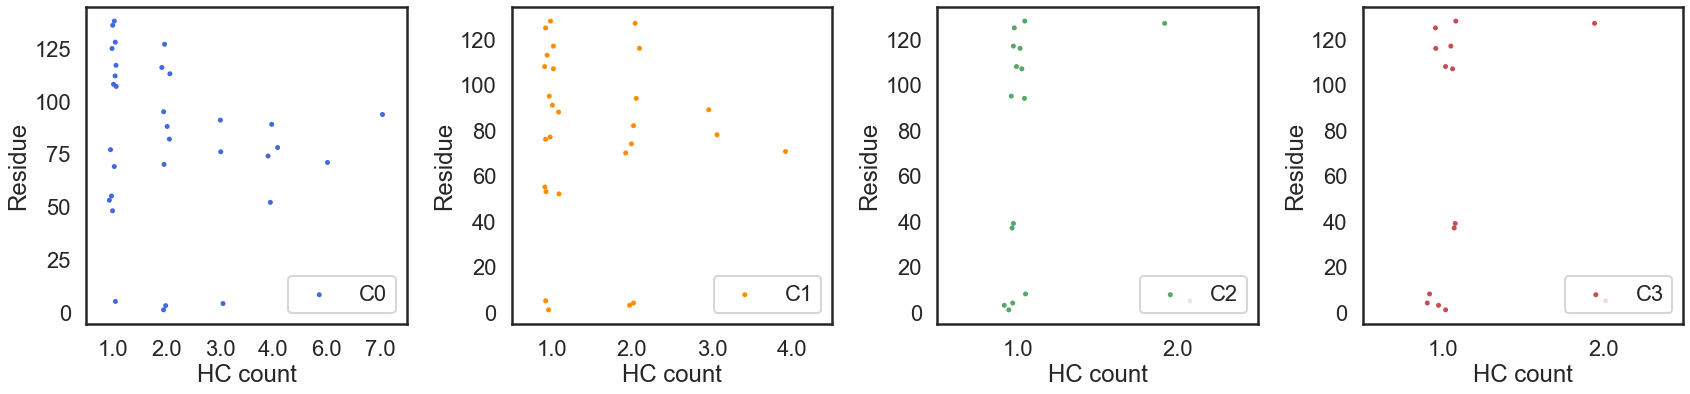

In [386]:
fig, axes = plt.subplots(ncols=4, figsize=(24, 6), sharex=False, sharey=False)
sns.set(style='white',context='poster',font_scale=1.0)
palette = sns.color_palette(["royalblue","darkorange","g","r",'mediumpurple'])
j=0
for i in range(4):
    sns.stripplot(data=HC.reset_index(),y='index',x='C'+str(i),ax=axes[i],color=palette[i],label='C'+str(i))
    axes[i].set_ylabel("Residue")
    axes[i].set_xlabel("HC count")
    axes[i].legend(['C'+str(i)],loc=4)
    j+=1

plt.tight_layout()

## Salt bridges

In [80]:
topfile = 'data/conf.gro'
traj_list='data/clusters/MS/Cluster0.xtc'

In [61]:
SB_0=return_SB_data(topfile=topfile,traj_list='data/clusters/MS/Cluster0.xtc')
SB_1=return_SB_data(topfile=topfile,traj_list='data/clusters/MS/Cluster1.xtc')
SB_2=return_SB_data(topfile=topfile,traj_list='data/clusters/MS/Cluster2.xtc')
SB_3=return_SB_data(topfile=topfile,traj_list='data/clusters/MS/Cluster3.xtc')

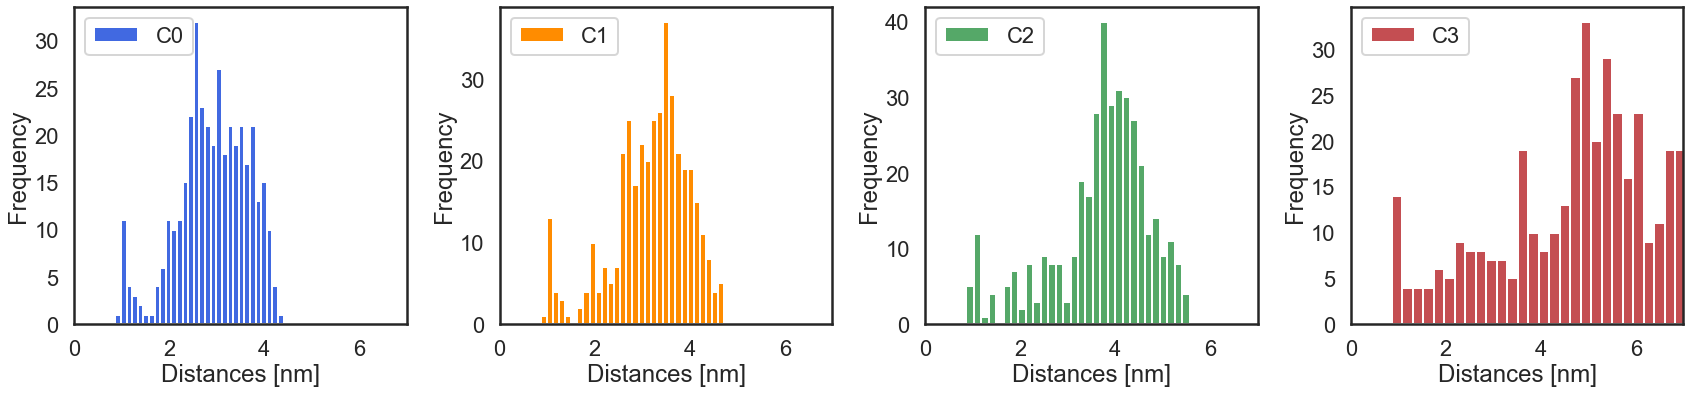

In [16]:
fig, axes = plt.subplots(ncols=4, figsize=(24, 6), sharex=False, sharey=False)
sns.set(style='white',context='poster',font_scale=1.0)
palette = sns.color_palette(["royalblue","darkorange","g","r",'mediumpurple'])
j=0
for i,sb in enumerate([SB_0,SB_1,SB_2,SB_3]):
    axes[i].hist(np.mean(sb,axis=0),color=palette[i],bins=30)
    #sns.stripplot(data=HC.reset_index(),y='index',x='C'+str(i),ax=axes[i],color=palette[i],label='C'+str(i))
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel("Distances [nm]")
    axes[i].set_xlim(0,7)
    axes[i].legend(['C'+str(i)],loc=2)
    j+=1

plt.tight_layout()

In [62]:
t=md.load(traj_list,top=topfile)
table, bonds = t.topology.to_dataframe()

#table.resName.unique()
pos_res=["LYS","HIS","ARG"]
neg_res=["ASP","GLU"]

pos_ids=table.resSeq[table['resName'].isin(pos_res)].unique()-1 
neg_ids=table.resSeq[table['resName'].isin(neg_res)].unique()-1
# Minus one because table starts sequence on 1, not on 0.

#Define charged pairs
SB_pairs=np.array(list(product(pos_ids,neg_ids)))

In [77]:
SB_clust=[]
for i,sb in enumerate([SB_0,SB_1,SB_2,SB_3]):
    sb_clust=[]
    # saltbridge distance lower than 0.45 nm, frequency larger than 5%
    sb_clust.append([str(t.top.residue(i)) for i in SB_pairs[np.mean(sb<0.45,axis=0)>0.049][:,0]]) 
    sb_clust.append([str(t.top.residue(i)) for i in SB_pairs[np.mean(sb<0.45,axis=0)>0.049][:,1]])
    SB_clust.append(sb_clust)

In [78]:
for i in range(4):
    dataframe=pd.DataFrame(SB_clust[i]).T
    dataframe[2]=dataframe[0].replace(region)
    dataframe[3]=dataframe[1].replace(region)
    dataframe["Interaction"]=dataframe[2]+"-"+ dataframe[3]
    dataframe["Intra-Domain"]=(dataframe[2]==dataframe[3])
    print(dataframe["Interaction"].value_counts())

Nte-Nte    7
Nte-Cte    5
Cte-Cte    5
Name: Interaction, dtype: int64
Nte-Nte    6
Cte-Cte    3
Nte-NAC    2
Name: Interaction, dtype: int64
Nte-Nte    4
Cte-Cte    3
Nte-NAC    2
Name: Interaction, dtype: int64
Nte-Nte    4
Cte-Cte    3
Nte-NAC    1
Name: Interaction, dtype: int64


In [79]:
SB_Nte=np.array([7,6,4,4])
SB_NAC=np.array([0,0,0,0])
SB_Cte=np.array([5,3,3,3])
SB_Mix=np.array([5,2,2,1])

palette = sns.color_palette(["r","darkorange","g","royalblue",'mediumpurple'])
seq=[0, 1,2,3]

Text(0.5, 1.0, 'Salt bridges')

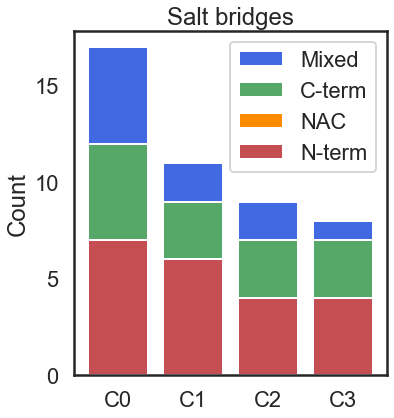

In [80]:
plt.figure(figsize=(6, 6))

plt.bar(x=seq,height=np.array(SB_Nte)+np.array(SB_NAC)+np.array(SB_Cte)+np.array(SB_Mix),color = palette[3],label='Mixed')
plt.bar(x=seq,height=np.array(SB_Nte)+np.array(SB_NAC)+np.array(SB_Cte),color = palette[2],label='C-term')
plt.bar(x=seq,height=np.array(SB_Nte)+np.array(SB_NAC),color = palette[1],label='NAC')
plt.bar(x=seq,height=np.array(SB_Nte),color = palette[0],label='N-term')
plt.xticks(ticks=seq,labels=['C0','C1','C2','C3'])
plt.legend()

plt.ylabel("Count")
plt.legend(loc=1)
plt.tight_layout()

plt.title("Salt bridges")

#plt.savefig("HB_Cs.pdf")




In [80]:
SB_all=return_SB_data(topfile=topfile,traj_list='data/traj_red.xtc')

(array([2.159e+03, 2.728e+03, 1.584e+03, 6.350e+02, 1.680e+02, 3.100e+01,
        5.000e+00, 2.000e+00, 1.000e+00, 0.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

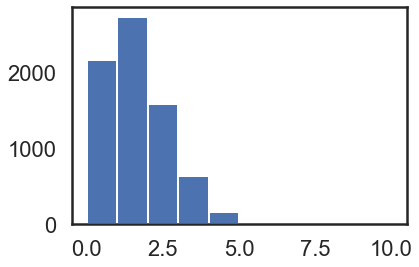

In [677]:
plt.hist(np.sum(SB_all<0.29,axis=1),range=[0,10])

(array([2.679e+03, 2.817e+03, 1.281e+03, 4.280e+02, 8.700e+01, 1.900e+01,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

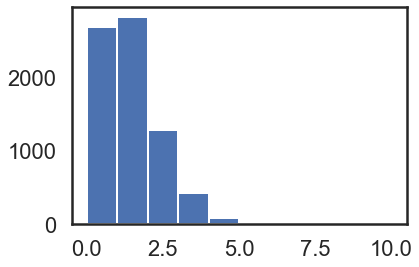

In [673]:
plt.hist(feat[:,5],range=[0,10])

# SMFS analysis

In [14]:
scaler=StandardScaler()

X=scaler.fit_transform(feat[:,[1,2,5]])
cluster=AgglomerativeClustering(linkage='ward',n_clusters=3).fit(X)

In [15]:
af.print_data(cluster_data=cluster,cluster_type='linkage',feat1=sasa)

Cl:     Feat1    Pop
 0: 153.89±9.76, 40.26%
 1: 132.75±8.39, 30.67%
 2: 142.85±7.70, 29.07%
 3: nan±nan, 0.00%


/Users/palomino/Documents/ASyn/aSyn-low-res-experiments/auxiliary_functions.py:47: RuntimeWarning: Mean of empty slice.
  print(f" {i}: {feat1[cluster_data.labels_==i].mean():2.2f}±{feat1[cluster_data.labels_==i].std():.2f}, {100*sum(cluster_data.labels_==i)/len(cluster_data.labels_==i):.2f}%")
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/num

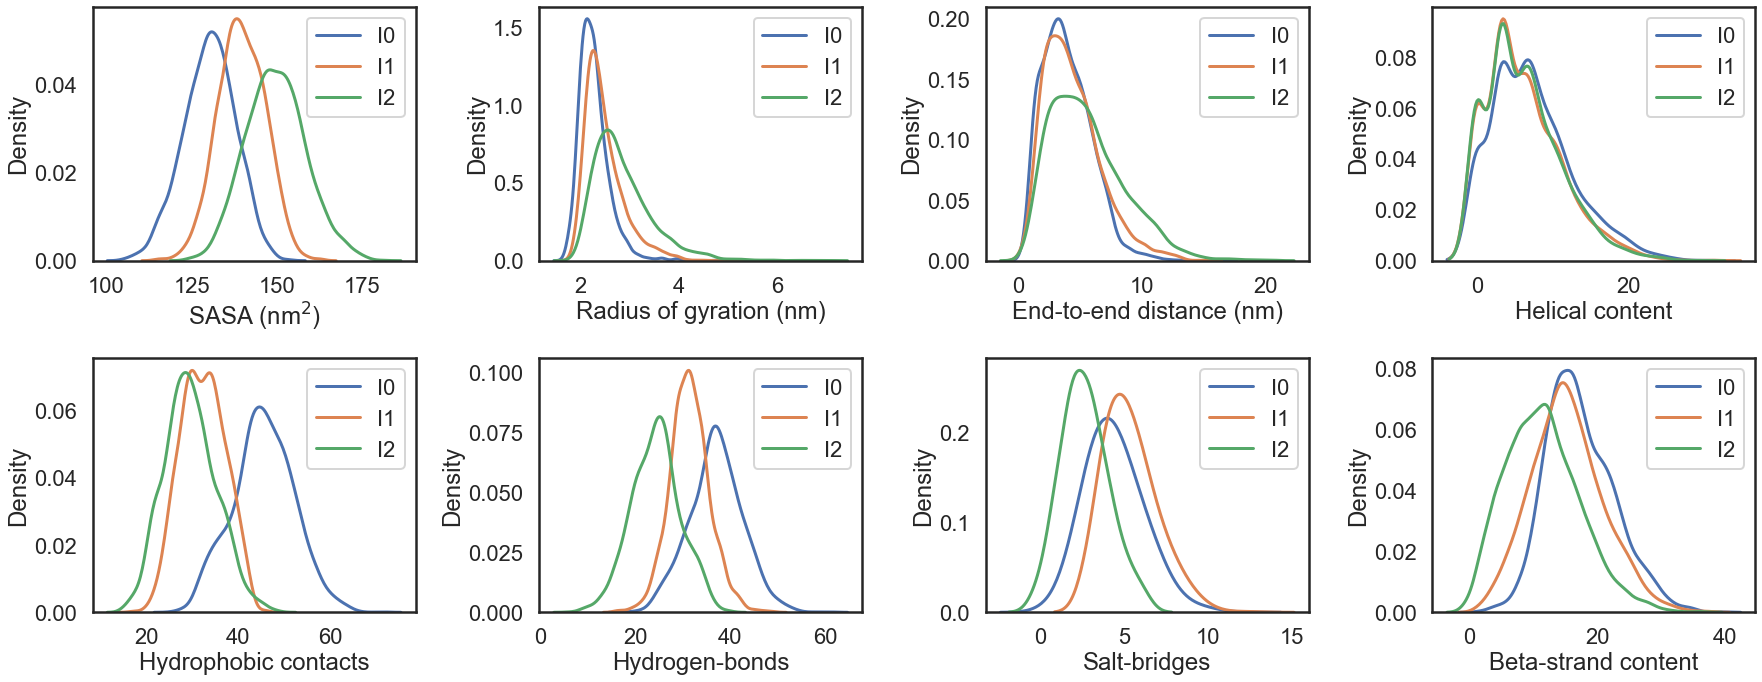

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10), sharex=False, sharey=False)
sns.set(style='white',context='poster',font_scale=1.0)
j=0
for i in [1,2,0]: #120
    mask=((cluster.labels_== i))
    
    sns.kdeplot(feat[:,4][mask], ax=axes[0,0], label="I"+str(j),)
    sns.kdeplot(feat[:,3][mask], ax=axes[0,1], label="I"+str(j),)
    sns.kdeplot(feat[:,0][mask], ax=axes[0,2], label="I"+str(j),)

    sns.kdeplot(feat[:,2][mask], ax=axes[1,0], label="I"+str(j), )
    sns.kdeplot(feat[:,1][mask], ax=axes[1,1], label="I"+str(j), )
    sns.kdeplot(feat[:,5][mask], ax=axes[1,2], label="I"+str(j),  bw_method=0.45)

  #  sns.kdeplot(secondary.Coil[::][mask], ax=axes[2,0], label="M"+str(j), )
    sns.kdeplot(SS[:,[7,8,9]][mask].sum(axis=1), ax=axes[0,3], label="I"+str(j) ,  bw_method=0.25)
    sns.kdeplot(SS[:,[3,4]][mask].sum(axis=1), ax=axes[1,3], label="I"+str(j), )
    
    #sns.kdeplot(secondary['Turn'][::][mask], ax=axes[2,2], label="C"+str(j), )

    j+=1
    
#for ax in axes:
#    ax.set_ylabel(r'Density estimation')    

axes[0,0].set_xlabel(r'SASA (nm$^2$)')
axes[0,1].set_xlabel(r'Radius of gyration (nm)')
axes[0,2].set_xlabel(r'End-to-end distance (nm)')

axes[1,0].set_xlabel(r'Hydrophobic contacts')
axes[1,1].set_xlabel(r'Hydrogen-bonds')
axes[1,2].set_xlabel(r'Salt-bridges')

#axes[2,0].set_xlabel(r'Irregular cont.')
axes[0,3].set_xlabel(r'Helical content')
axes[1,3].set_xlabel(r'Beta-strand content')
#axes[2,2].set_xlabel(r'α-helix turn cont.')
    
for ax in axes.flatten():
    ax.legend(loc=1)  

fig.tight_layout()

#fig.suptitle("D. E. Shaw ensemble",x=0.5,y=1.015)

#plt.savefig("distribution1.pdf",dpi=300)

plt.show()



## Getting indexes from the clusters

In [19]:
gg=np.array(range(1,7314))

k=0
for j in [1,2,0]:
    arf=gg[(cluster.labels_==j)]

    print("[ Cluster "+str(k)+" ]")
    for i in range(round(len(arf)/20)+1):
        print(*arf[(20*i):20*(i+1)],sep=" ")   
    k+=1

[ Cluster 0 ]
32 33 34 41 73 87 89 91 99 104 106 107 144 259 262 288 402 519 589 640
641 645 648 649 651 652 656 659 660 671 672 673 675 676 677 722 723 724 726 728
737 739 750 760 763 789 795 796 799 810 836 929 931 978 997 999 1001 1002 1011 1093
1095 1096 1097 1099 1101 1102 1108 1109 1112 1113 1114 1116 1117 1118 1119 1120 1121 1122 1123 1124
1125 1126 1127 1128 1129 1130 1133 1136 1138 1139 1140 1141 1143 1144 1145 1147 1148 1149 1150 1151
1152 1153 1155 1157 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175
1176 1177 1179 1180 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198
1199 1200 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218
1219 1220 1221 1222 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239
1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259
1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1

6038 6040 6042 6043 6044 6045 6046 6047 6050 6051 6052 6054 6056 6057 6058 6060 6062 6063 6064 6065
6066 6067 6068 6069 6084 6089 6090 6091 6093 6101 6102 6103 6107 6108 6110 6128 6130 6131 6132 6133
6134 6135 6136 6138 6139 6142 6145 6147 6149 6152 6153 6155 6156 6157 6158 6162 6165 6168 6169 6171
6172 6173 6177 6178 6179 6181 6182 6183 6187 6190 6197 6198 6199 6201 6206 6219 6222 6225 6226 6227
6230 6232 6233 6237 6238 6239 6242 6243 6244 6245 6247 6248 6250 6251 6252 6253 6255 6256 6257 6259
6260 6261 6262 6264 6265 6266 6269 6270 6272 6274 6275 6276 6278 6279 6280 6281 6282 6283 6284 6285
6286 6287 6288 6291 6292 6293 6295 6297 6301 6302 6303 6304 6308 6311 6312 6313 6317 6318 6319 6321
6322 6323 6324 6325 6326 6327 6328 6329 6331 6332 6333 6337 6338 6339 6340 6341 6343 6344 6346 6347
6348 6349 6350 6363 6396 6397 6398 6399 6400 6405 6406 6407 6409 6410 6415 6422 6423 6435 6448 6449
6454 6455 6460 6466 6467 6468 6469 6472 6475 6477 6478 6482 6483 6485 6486 6488 6490 6496 6500 6501


4451 4452 4453 4454 4455 4457 4458 4459 4462 4463 4464 4465 4466 4468 4471 4472 4473 4474 4476 4477
4478 4479 4480 4484 4485 4486 4487 4489 4490 4491 4492 4494 4495 4496 4497 4500 4502 4504 4505 4508
4511 4513 4516 4521 4522 4523 4524 4526 4527 4528 4531 4532 4533 4534 4535 4536 4537 4538 4539 4540
4541 4542 4543 4544 4545 4546 4547 4549 4550 4555 4559 4560 4562 4565 4567 4569 4570 4573 4574 4577
4579 4580 4581 4582 4583 4584 4585 4586 4587 4589 4590 4591 4593 4595 4599 4608 4612 4613 4617 4621
4629 4631 4634 4635 4636 4637 4638 4639 4641 4642 4643 4644 4645 4646 4649 4650 4655 4656 4657 4658
4659 4660 4661 4662 4664 4665 4667 4669 4673 4674 4675 4676 4677 4678 4682 4684 4687 4688 4689 4690
4691 4692 4693 4694 4695 4696 4697 4698 4699 4700 4701 4703 4704 4705 4706 4707 4708 4709 4710 4711
4713 4714 4715 4716 4717 4718 4719 4720 4721 4722 4723 4726 4729 4733 4736 4739 4740 4744 4748 4752
4754 4755 4756 4761 4770 4771 4778 4779 4780 4781 4782 4783 4784 4785 4786 4787 4788 4789 4790 4791


## SASA

In [23]:
topfile = 'data/conf.gro'
traj_list = 'data/clusters/smFS/Cluster0.xtc'

In [31]:
t=md.load(traj_list,top=topfile)
MaxSASAs=np.array([MaxASA[str(t.top.residue(i))[:3]] for i in range(140)])

In [32]:
SASA_0=np.mean(sasa_res[cluster.labels_==1],axis=0)
SASA_1=np.mean(sasa_res[cluster.labels_==2],axis=0)
SASA_2=np.mean(sasa_res[cluster.labels_==0],axis=0)

Text(103.0, 14, 'C-term')

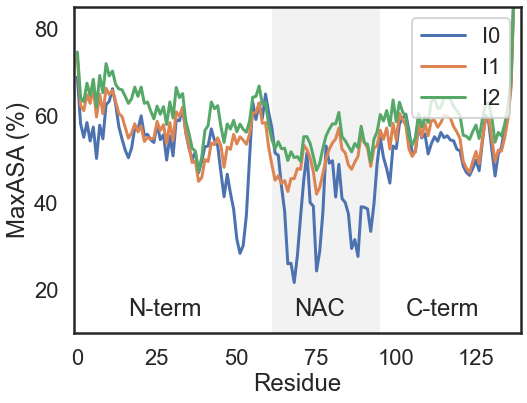

In [38]:
plt.figure(figsize=(8, 6))

plt.plot(100*moving_average(SASA_0/MaxSASAs),label='I0')
plt.plot(100*moving_average(SASA_1/MaxSASAs),label='I1')
plt.plot(100*moving_average(SASA_2/MaxSASAs),label='I2')

plt.axvspan(61, 95, facecolor='grey', alpha=0.1)
plt.xlim(-1,139)
plt.ylim(10,85)
plt.xlabel("Residue")
plt.ylabel("MaxASA (%)")
plt.legend(loc=1)

plt.text(16.0,14,"N-term")
plt.text(68.0,14,"NAC")
plt.text(103.,14,"C-term")




## HB

In [39]:
HB_0=return_HB_data(topfile=topfile,traj_list='data/clusters/smFS/Cluster0.xtc')
HB_1=return_HB_data(topfile=topfile,traj_list='data/clusters/smFS/Cluster1.xtc')
HB_2=return_HB_data(topfile=topfile,traj_list='data/clusters/smFS/Cluster2.xtc')

Cte-Cte    6
NAC-NAC    4
Nte-Nte    3
Name: Interaction, dtype: int64
Cte-Cte    3
Nte-Nte    2
Name: Interaction, dtype: int64
Cte-Cte    3
Nte-Nte    1
Name: Interaction, dtype: int64


In [42]:
HB_Nte=np.array([4,2,1])
HB_NAC=np.array([3,0,0])
HB_Cte=np.array([6,3,3])

palette = sns.color_palette(["r","darkorange","g","royalblue",'mediumpurple'])
seq=[0,1,2]

Text(0.5, 1.0, 'Hydrogen bonds')

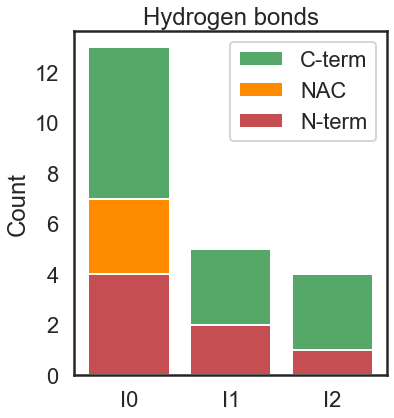

In [43]:
plt.figure(figsize=(6, 6))

plt.bar(x=seq,height=np.array(HB_Nte)+np.array(HB_NAC)+np.array(HB_Cte),color = palette[2],label='C-term')
plt.bar(x=seq,height=np.array(HB_Nte)+np.array(HB_NAC),color = palette[1],label='NAC')
plt.bar(x=seq,height=np.array(HB_Nte),color = palette[0],label='N-term')
plt.xticks(ticks=seq,labels=['I0','I1','I2'])
plt.legend()

plt.ylabel("Count")
plt.legend(loc=1)
plt.tight_layout()

plt.title("Hydrogen bonds")

#plt.savefig("HB_Cs.pdf")



In [157]:
HB=pd.concat([HB_0.rename('I0'),HB_1.rename('I1'),HB_2.rename('I2')], axis=1,)

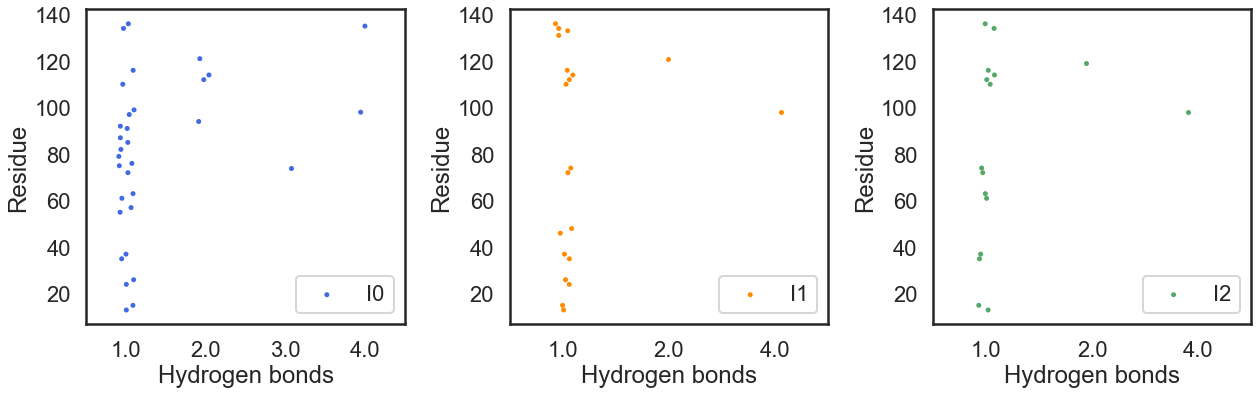

In [160]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6), sharex=False, sharey=False)
sns.set(style='white',context='poster',font_scale=1.0)
palette = sns.color_palette(["royalblue","darkorange","g","r",'mediumpurple'])
j=0
for i in range(3):
    sns.stripplot(data=HB.sort_index().reset_index(),y='index',x='I'+str(i),ax=axes[i],color=palette[i],label='C'+str(i))
    #sns.stripplot(data=HB.sort_index().reset_index(),y='index',x='C'+str(i+1),ax=axes[i],color=palette[i+1],label='C'+str(i+1))
    axes[i].set_ylabel("Residue")
    axes[i].set_xlabel("Hydrogen bonds")
    axes[i].legend(['I'+str(i)],loc=4)
    j+=1

plt.tight_layout()

## HC

In [44]:
HC_0=return_HC_data(topfile='data/clusters/conf_side.gro', traj_list='data/clusters/smFS/Cluster0_side.xtc')
HC_1=return_HC_data(topfile='data/clusters/conf_side.gro', traj_list='data/clusters/smFS/Cluster1_side.xtc')
HC_2=return_HC_data(topfile='data/clusters/conf_side.gro', traj_list='data/clusters/smFS/Cluster2_side.xtc')

NAC-NAC    11
Cte-Cte    11
Nte-Nte     9
Nte-NAC     6
NAC-Cte     5
Nte-Cte     2
Name: Interaction, dtype: int64
Nte-Nte    8
Cte-Cte    8
NAC-NAC    2
Name: Interaction, dtype: int64
Nte-Nte    7
Cte-Cte    7
Name: Interaction, dtype: int64


In [45]:
HC_Nte=np.array([ 9, 8, 7])
HC_NAC=np.array([11, 2, 0])
HC_Cte=np.array([11, 8, 7])
HC_Mix=np.array([13, 0, 0])

palette = sns.color_palette(["r","darkorange","g","royalblue",'mediumpurple'])
seq=[0, 1,2]

Text(0.5, 1.0, 'Hydrophobic contacts')

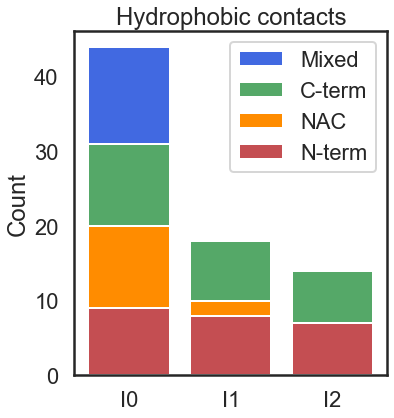

In [46]:
plt.figure(figsize=(6, 6))

plt.bar(x=seq,height=np.array(HC_Nte)+np.array(HC_NAC)+np.array(HC_Cte)+np.array(HC_Mix),color = palette[3],label='Mixed')
plt.bar(x=seq,height=np.array(HC_Nte)+np.array(HC_NAC)+np.array(HC_Cte),color = palette[2],label='C-term')
plt.bar(x=seq,height=np.array(HC_Nte)+np.array(HC_NAC),color = palette[1],label='NAC')
plt.bar(x=seq,height=np.array(HC_Nte),color = palette[0],label='N-term')
plt.xticks(ticks=seq,labels=['I0','I1','I2'])
plt.legend()

plt.ylabel("Count")
plt.legend(loc=1)
plt.tight_layout()

plt.title("Hydrophobic contacts")

#plt.savefig("HB_Cs.pdf")




In [165]:
HC=pd.concat([HC_0,HC_1,HC_2], axis=1)
HC.columns=["I0","I1","I2"]

new_index=[int(str(t.topology.residue(i))[3:]) for i in HC.index.to_list()]
HC.index=new_index

HC=HC.sort_index()

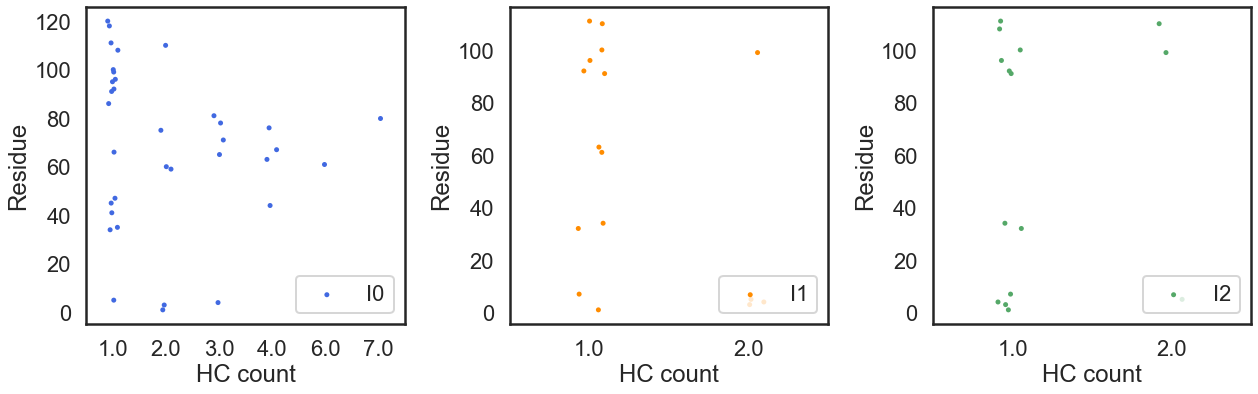

In [167]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6), sharex=False, sharey=False)
sns.set(style='white',context='poster',font_scale=1.0)
palette = sns.color_palette(["royalblue","darkorange","g","r",'mediumpurple'])
j=0
for i in range(3):
    sns.stripplot(data=HC.reset_index(),y='index',x='I'+str(i),ax=axes[i],color=palette[i],label='I'+str(i))
    axes[i].set_ylabel("Residue")
    axes[i].set_xlabel("HC count")
    axes[i].legend(['I'+str(i)],loc=4)
    j+=1

plt.tight_layout()

## SB

In [47]:
SB_0=return_SB_data(topfile=topfile,traj_list='data/clusters/smFS/Cluster0.xtc')
SB_1=return_SB_data(topfile=topfile,traj_list='data/clusters/smFS/Cluster1.xtc')
SB_2=return_SB_data(topfile=topfile,traj_list='data/clusters/smFS/Cluster2.xtc')

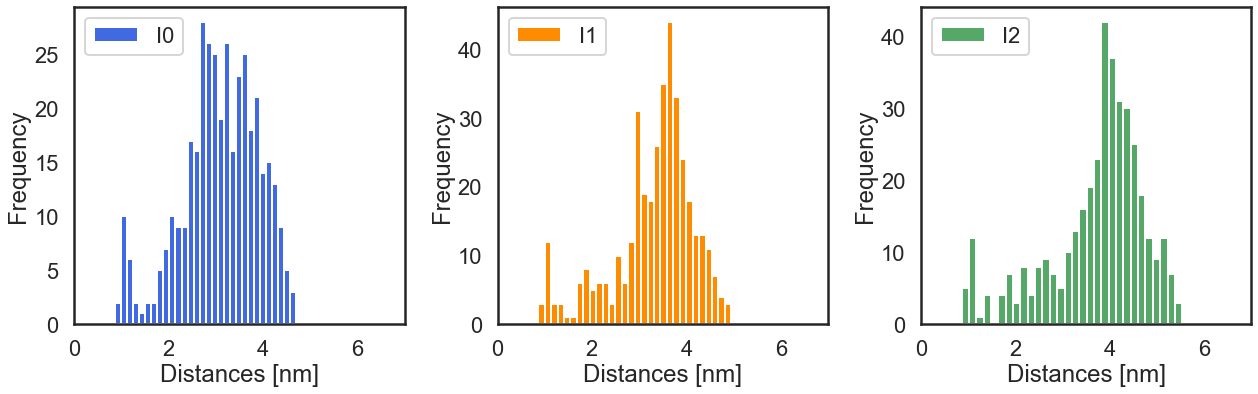

In [175]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6), sharex=False, sharey=False)
sns.set(style='white',context='poster',font_scale=1.0)
palette = sns.color_palette(["royalblue","darkorange","g","r",'mediumpurple'])
j=0
for i,sb in enumerate([SB_0,SB_1,SB_2]):
    axes[i].hist(np.mean(sb,axis=0),color=palette[i],bins=30)
    #sns.stripplot(data=HC.reset_index(),y='index',x='C'+str(i),ax=axes[i],color=palette[i],label='C'+str(i))
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel("Distances [nm]")
    axes[i].set_xlim(0,7)
    axes[i].legend(['I'+str(i)],loc=2)
    j+=1

plt.tight_layout()

In [48]:
t=md.load(traj_list,top=topfile)
table, bonds = t.topology.to_dataframe()

#table.resName.unique()
pos_res=["LYS","HIS","ARG"]
neg_res=["ASP","GLU"]

pos_ids=table.resSeq[table['resName'].isin(pos_res)].unique()-1 
neg_ids=table.resSeq[table['resName'].isin(neg_res)].unique()-1
# Minus one because table starts sequence on 1, not on 0.

#Define charged pairs
SB_pairs=np.array(list(product(pos_ids,neg_ids)))

In [86]:
SB_clust=[]
for i,sb in enumerate([SB_0,SB_1,SB_2]):
    sb_clust=[]
    # saltbridge distance lower than 0.45 nm, frequency larger than 5%
    sb_clust.append([str(t.top.residue(i)) for i in SB_pairs[np.mean(sb<0.45,axis=0)>0.06][:,0]]) 
    sb_clust.append([str(t.top.residue(i)) for i in SB_pairs[np.mean(sb<0.45,axis=0)>0.06][:,1]])
    SB_clust.append(sb_clust)

In [87]:
for i in range(3):
    dataframe=pd.DataFrame(SB_clust[i]).T
    dataframe[2]=dataframe[0].replace(region)
    dataframe[3]=dataframe[1].replace(region)
    dataframe["Interaction"]=dataframe[2]+"-"+ dataframe[3]
    dataframe["Intra-Domain"]=(dataframe[2]==dataframe[3])
    print(dataframe["Interaction"].value_counts())

Nte-Nte    3
Cte-Cte    2
NAC-Cte    1
Name: Interaction, dtype: int64
Nte-Nte    5
Cte-Cte    3
Nte-NAC    2
Name: Interaction, dtype: int64
Cte-Cte    2
Nte-Nte    1
Name: Interaction, dtype: int64


In [76]:
SB_Nte=np.array([5,8,3])
SB_NAC=np.array([0,1,0])
SB_Cte=np.array([4,5,3])
SB_Mix=np.array([2,4,1])

palette = sns.color_palette(["r","darkorange","g","royalblue",'mediumpurple'])
seq=[0, 1,2]

Text(0.5, 1.0, 'Salt bridges')

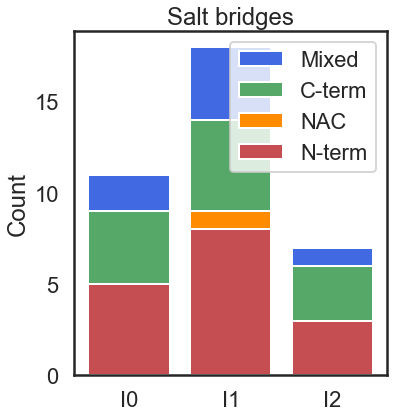

In [77]:
plt.figure(figsize=(6, 6))

plt.bar(x=seq,height=np.array(SB_Nte)+np.array(SB_NAC)+np.array(SB_Cte)+np.array(SB_Mix),color = palette[3],label='Mixed')
plt.bar(x=seq,height=np.array(SB_Nte)+np.array(SB_NAC)+np.array(SB_Cte),color = palette[2],label='C-term')
plt.bar(x=seq,height=np.array(SB_Nte)+np.array(SB_NAC),color = palette[1],label='NAC')
plt.bar(x=seq,height=np.array(SB_Nte),color = palette[0],label='N-term')
plt.xticks(ticks=seq,labels=['I0','I1','I2'])
plt.legend()

plt.ylabel("Count")
plt.legend(loc=1)
plt.tight_layout()

plt.title("Salt bridges")

#plt.savefig("HB_Cs.pdf")





In [177]:
for i,sb in enumerate([SB_0,SB_1,SB_2]):
    print([t.top.residue(i) for i in SB_pairs[np.mean(sb<0.4,axis=0)>0.055][:,0]])
    print([t.top.residue(i) for i in SB_pairs[np.mean(sb<0.4,axis=0)>0.055][:,1]])
    print("")

[LYS60, LYS80]
[GLU57, GLU104]

[LYS6, LYS10, LYS23, LYS32, LYS43, LYS45, LYS45, LYS58, LYS60, LYS80, LYS97, LYS97, LYS102, LYS102]
[ASP2, GLU13, GLU20, GLU28, GLU46, GLU35, GLU61, GLU61, GLU57, GLU123, GLU105, GLU114, GLU104, GLU105]

[]
[]



# Overlap between featurizations

In [118]:
from sklearn.manifold import TSNE

In [180]:
tsne = TSNE(n_components=2, verbose=1,
            perplexity=50, #25 is gud
            n_iter=1000, 
            early_exaggeration=50, 
            init='pca',
            random_state=1996,
            learning_rate=500
            )

X = StandardScaler().fit_transform(feat)
embeddings = tsne.fit_transform(X) #all features

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7313 samples in 0.005s...
[t-SNE] Computed neighbors for 7313 samples in 0.565s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7313
[t-SNE] Computed conditional probabilities for sample 2000 / 7313
[t-SNE] Computed conditional probabilities for sample 3000 / 7313
[t-SNE] Computed conditional probabilities for sample 4000 / 7313
[t-SNE] Computed conditional probabilities for sample 5000 / 7313
[t-SNE] Computed conditional probabilities for sample 6000 / 7313
[t-SNE] Computed conditional probabilities for sample 7000 / 7313
[t-SNE] Computed conditional probabilities for sample 7313 / 7313
[t-SNE] Mean sigma: 0.457811


/Users/palomino/opt/anaconda3/envs/MDanal/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 445.268707
[t-SNE] KL divergence after 1000 iterations: 1.915499


In [201]:
scaler=StandardScaler()
X=scaler.fit_transform(np.vstack((sasa,CCS)).T)
cluster1=AgglomerativeClustering(linkage='ward',n_clusters=4).fit(X)

In [202]:
af.print_data(cluster_data=cluster1,
              cluster_type='linkage',
              feat1=sasa,ordering=[3,0,1,2])

Cl:     Feat1    Pop
 3: 125.29±4.98, 14.84%
 0: 139.63±4.93, 42.27%
 1: 151.56±5.05, 31.42%
 2: 165.30±5.76, 11.47%


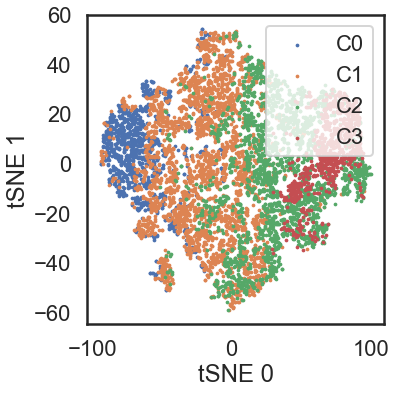

In [192]:
plt.figure(figsize=(6, 6))
for idx,i in enumerate([3,0,1,2]):
    plt.scatter(embeddings[:,0][cluster1.labels_==i],
                embeddings[:,1][cluster1.labels_==i],
                label="C"+str(idx),s=3)

plt.legend(loc=1)

plt.xlabel("tSNE 0")
plt.ylabel("tSNE 1")

plt.tight_layout()

#plt.savefig("distribution_j1.pdf",dpi=300)

In [203]:
scaler=StandardScaler()

X=scaler.fit_transform(feat[:,[1,2,5]])
cluster2=AgglomerativeClustering(linkage='ward',n_clusters=3).fit(X)

In [204]:
af.print_data(cluster_data=cluster2,
              cluster_type='linkage',
              feat1=sasa,ordering=[1,2,0])

Cl:     Feat1    Pop
 1: 132.75±8.39, 30.67%
 2: 142.85±7.70, 29.07%
 0: 153.89±9.76, 40.26%


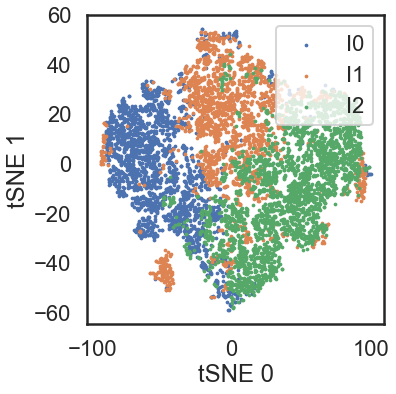

In [189]:
plt.figure(figsize=(6, 6))
for idx,i in enumerate([1,2,0]):
    plt.scatter(embeddings[:,0][cluster2.labels_==i],
                embeddings[:,1][cluster2.labels_==i],
                label="I"+str(idx),s=3)

plt.legend(loc=1)

plt.xlabel("tSNE 0")
plt.ylabel("tSNE 1")

plt.tight_layout()

## Overlap statistics

In [ ]:
3012, 120

In [256]:
#C0/I0
arr_1=(cluster1.labels_==3) #C
arr_2=(cluster2.labels_==1) #I

j=0
for i in range(len(arr_2)):
    if arr_1[i]==arr_2[i]:
        if arr_1[i]==1: j+=1

print("Overlap of conformations: ",round(100*j/len(arr_2),2))
print("Coverage of both arrays: ", 200*j/(np.sum(arr_1)+np.sum(arr_2)))

Overlap of conformations:  12.65
Coverage of both arrays:  55.58894230769231


In [254]:
#C1/I1
arr_1=(cluster1.labels_==0) #C
arr_2=(cluster2.labels_==2) #I

j=0
for i in range(len(arr_2)):
    if arr_1[i]==arr_2[i]:
        if arr_1[i]==1: j+=1

print("Overlap of conformations: ",round(100*j/len(arr_2),2))
print("Coverage of both arrays: ", 200*j/(np.sum(arr_1)+np.sum(arr_2)))
      
      
      #round(100*(np.sum(arr_1)+np.sum(arr_2))/(2*np.sum(arr_1+arr_2)),2))




Overlap of conformations:  16.7
Coverage of both arrays:  46.808510638297875


In [257]:
#C2+C3/I2
arr_1=((cluster1.labels_==1)+(cluster1.labels_==2)) #C
arr_2=(cluster2.labels_==0) #I

j=0
for i in range(len(arr_2)):
    if arr_1[i]==arr_2[i]:
        if arr_1[i]==1: j+=1

print("Overlap of conformations: ",round(100*j/len(arr_2),2))
print("Coverage of both arrays: ", 200*j/(np.sum(arr_1)+np.sum(arr_2)))


Overlap of conformations:  30.27
Coverage of both arrays:  72.81697089294524


# Comparison with FRET data

In [162]:
CA_atoms=np.vstack((t.top.select("name CA and residue 18 26"),
           t.top.select("name CA and residue 26 39"),
           t.top.select("name CA and residue 4 18"),
           t.top.select("name CA and residue 18 39"),
           t.top.select("name CA and residue 4 26"),
           t.top.select("name CA and residue 66 90"),
           t.top.select("name CA and residue 39 66"),
           t.top.select("name CA and residue 4 39"),
          ))

dists=md.compute_distances(t,CA_atoms,periodic=0)

In [170]:
!ls data/clusters/FRET_Chen/distances/

18-26.csv 18-39.csv 26-39.csv 39-66.csv 4-18.csv  4-26.csv  4-39.csv  66-90.csv


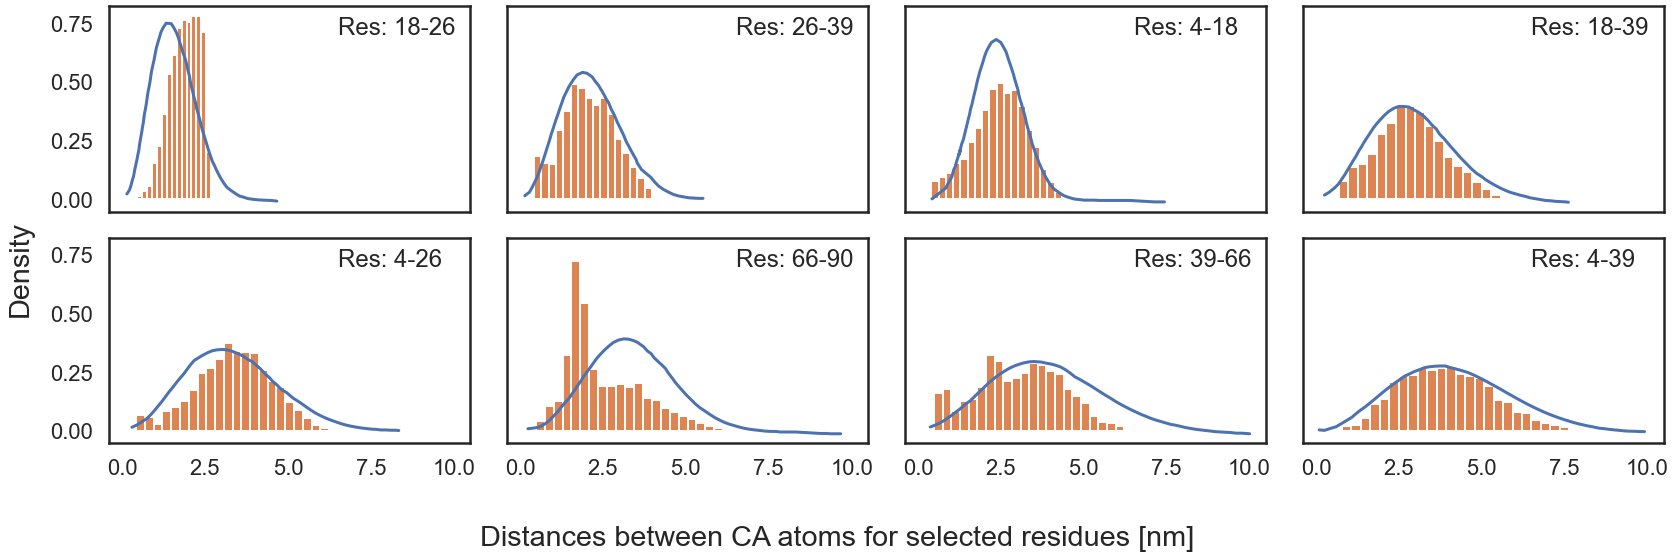

In [269]:
fig, axes=plt.subplots(figsize=[24,8],nrows=2,ncols=4,sharey=True,sharex=True)

index_data=0
#ET_exp=[0.71,0.61,0.52,0.40,0.35,0.27,0.24,0.20]
interactions=["18-26","26-39","4-18","18-39","4-26","66-90",
             "39-66","4-39"]

for row_i in [0,1]:
    for col_j in [0,1,2,3]:
        blank=np.loadtxt(fname="data/clusters/FRET_Chen/distances/"+interactions[index_data]+".csv")
        axes[row_i,col_j].plot(blank[:,0]/10,12.5*blank[:,1])
        #(mu,sigma)=norm.fit(dists[:,index_data])
        n,bins,patches=axes[row_i,col_j].hist(dists[:,index_data],bins=15+2*index_data,density=1)
 
        axes[row_i,col_j].text(6.5,0.7,"Res: "+interactions[index_data])
        index_data+=1
        
#plt.suptitle("Comparison with Grupi et al., 2011") 
fig.supxlabel('Distances between CA atoms for selected residues [nm]')
fig.supylabel('Density')
fig.tight_layout()
plt.show()

In [259]:
FRET=np.loadtxt(fname='data/clusters/FRET_Chen/FRET_Grupi.dat')
weights=np.ones_like(FRET[:,0])/len(FRET[:,0])

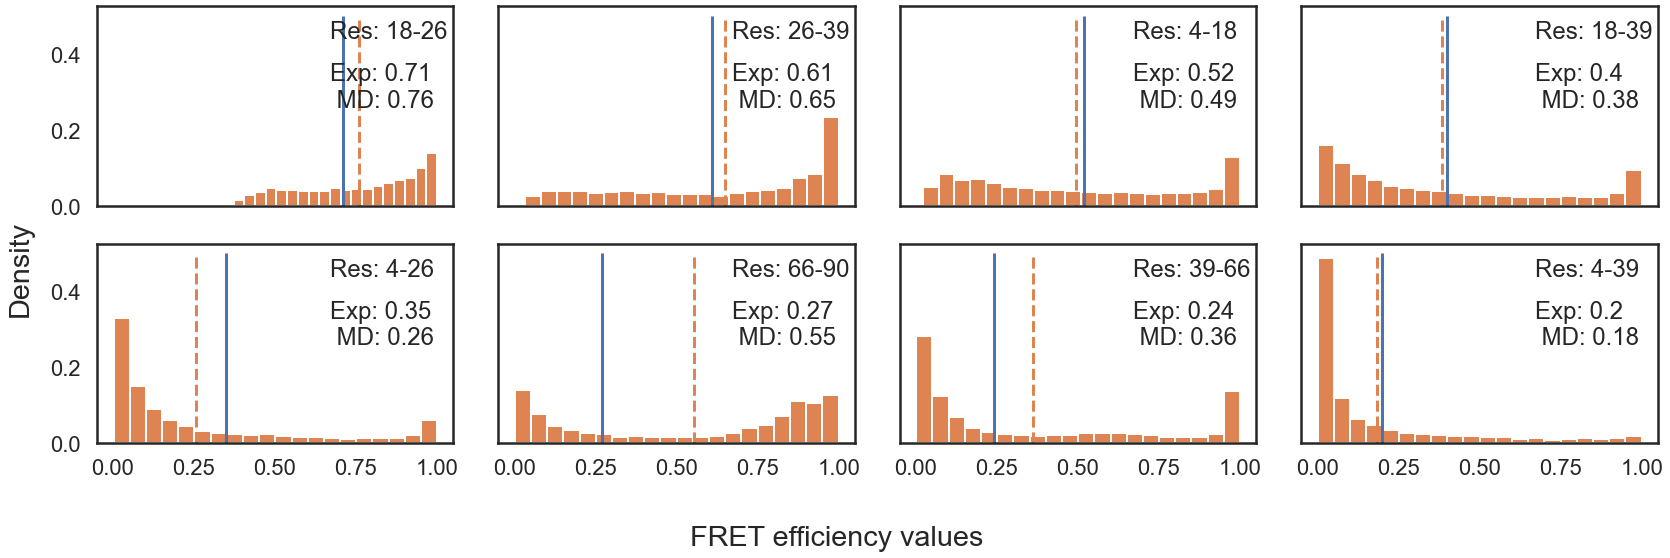

In [278]:
fig, axes=plt.subplots(figsize=[24,8],nrows=2,ncols=4,sharey=True,sharex=True)

index_data=1
ET_exp=[0.71,0.61,0.52,0.40,0.35,0.27,0.24,0.20]
interactions=["18-26","26-39","4-18","18-39","4-26","66-90",
             "39-66","4-39"]

for row_i in [0,1]:
    for col_j in [0,1,2,3]:
        axes[row_i,col_j].hist(FRET[:,index_data],bins=20,weights=weights,color=sns.color_palette()[1])
        axes[row_i,col_j].vlines(ET_exp[index_data-1],0,.5,)
        axes[row_i,col_j].vlines(FRET[:,index_data].mean(),0,.5,linestyle='--',color=sns.color_palette()[1])
        
        #hist(FRET[:,index_data],bins=20,weights=weights,color=sns.color_palette()[1])
        axes[row_i,col_j].text(0.67,0.44,"Res: "+interactions[index_data-1])
        axes[row_i,col_j].text(0.67,0.33,"Exp: "+str(round(ET_exp[index_data-1],2)))
        axes[row_i,col_j].text(0.67,0.26," MD: "+str(FRET[:,index_data].mean().round(2)))
        index_data+=1
        
#plt.suptitle("Comparison with Grupi and Haas, 2011") 
fig.supxlabel('FRET efficiency values')
fig.supylabel('Density')




fig.tight_layout()
plt.show()

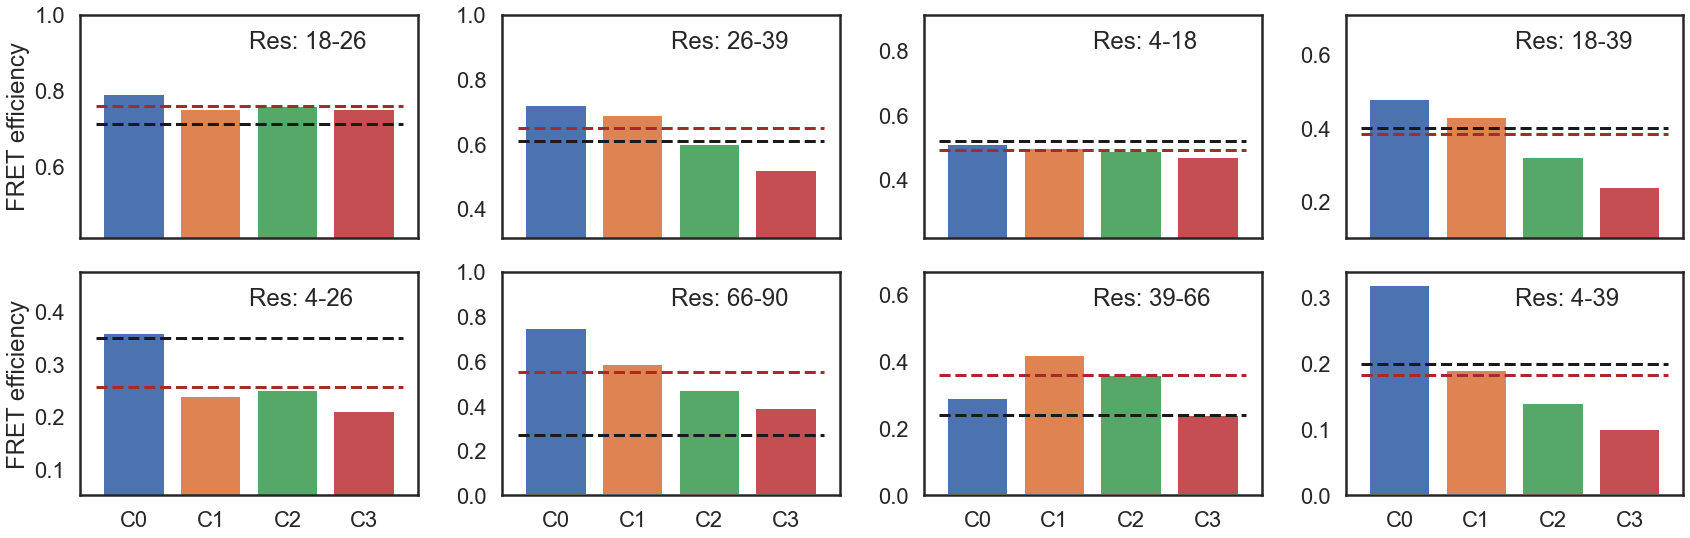

In [198]:
fig, axes=plt.subplots(figsize=[24,8],nrows=2,ncols=4,sharey=False,sharex=True)

index_data=0
seq=[0,1,2,3]
ET_exp=[0.71,0.61,0.52,0.40,0.35,0.27,0.24,0.20]
interactions=["18-26","26-39","4-18","18-39","4-26","66-90",
             "39-66","4-39"]
palette = sns.color_palette()


for row_i in [0,1]:
    axes[row_i,0].set_ylabel("FRET efficiency")
    for col_j in [0,1,2,3]:
        axes[row_i,col_j].bar(x=seq,color=palette,height=[FRET[:,(index_data+1)][cluster1.labels_==cluster_k].mean().round(2) for cluster_k in [3,0,1,2]])
        axes[row_i,col_j].hlines(ET_exp[index_data],-0.5,3.5,'k','--')
        axes[row_i,col_j].hlines(FRET[:,(index_data+1)].mean(),-0.5,3.5,'brown','--')
        axes[row_i,col_j].set_ylim(max(0,ET_exp[index_data]-0.3),
                                   min(1,1.85*FRET[:,(index_data+1)].mean()))
        axes[row_i,col_j].set_xticks(ticks=seq,labels=['C0','C1','C2','C3'])
        axes[row_i,col_j].text(1.5,
                               0.85*(axes[row_i,col_j].get_ylim()[1]-axes[row_i,col_j].get_ylim()[0])+axes[row_i,col_j].get_ylim()[0],
                               "Res: "+interactions[index_data])
        
        index_data+=1
        
#axes[1,1].set_ylim(ET_exp[5]-0.2, ET_exp[5]+0.5)
        
#plt.suptitle(r"FRET Efficiency as described by the I0-I2 conformational components") 
fig.tight_layout()
plt.show()

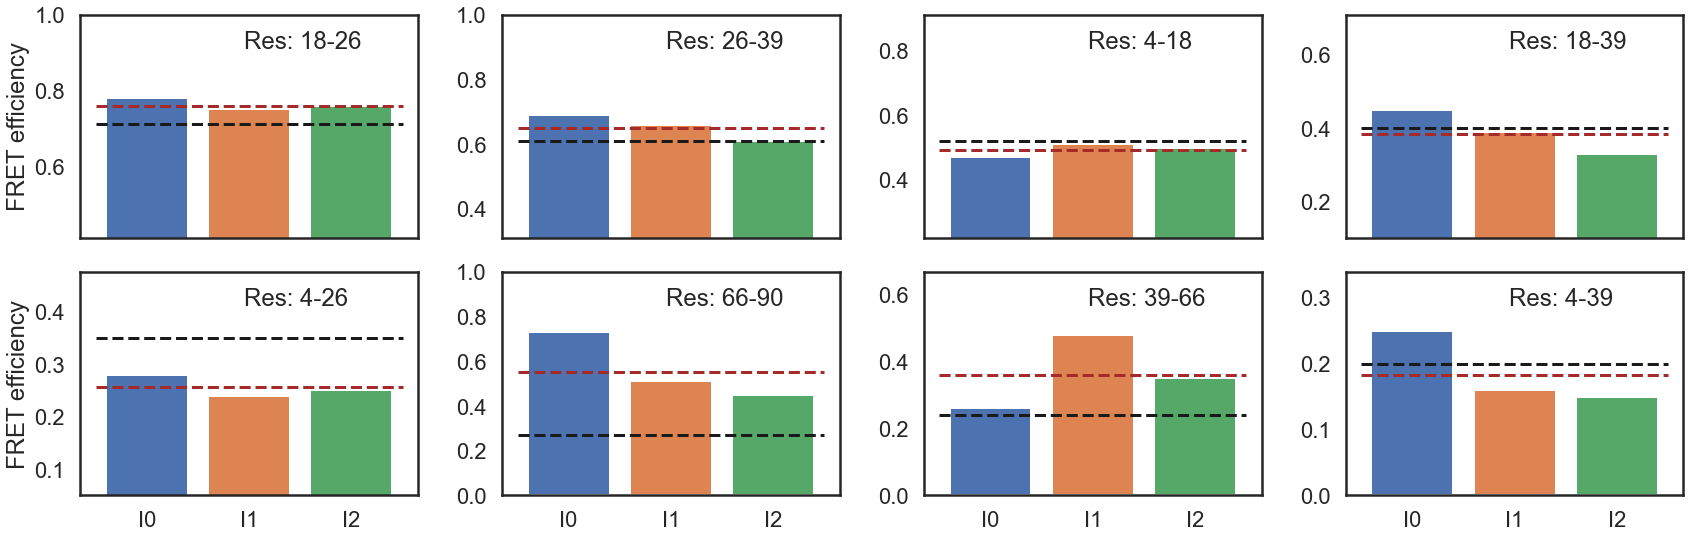

In [200]:
sns.set(style='white',context='poster',font_scale=1.0)


fig, axes=plt.subplots(figsize=[24,8],nrows=2,ncols=4,sharey=False,sharex=True)

index_data=0
seq=[0,1,2]
ET_exp=[0.71,0.61,0.52,0.40,0.35,0.27,0.24,0.20]
interactions=["18-26","26-39","4-18","18-39","4-26","66-90",
             "39-66","4-39"]

for row_i in [0,1]:
    axes[row_i,0].set_ylabel("FRET efficiency")
    for col_j in [0,1,2,3]:
        axes[row_i,col_j].bar(x=seq,color=palette,height=[FRET[:,(index_data+1)][cluster2.labels_==cluster_k].mean().round(2) for cluster_k in [1,2,0]])
        axes[row_i,col_j].hlines(ET_exp[index_data],-0.5,2.5,'k','--')
        axes[row_i,col_j].hlines(FRET[:,(index_data+1)].mean(),-0.5,2.5,'brown','--')

        axes[row_i,col_j].set_ylim(max(0,ET_exp[index_data]-0.3),
                                   min(1,1.85*FRET[:,(index_data+1)].mean()))
        axes[row_i,col_j].set_xticks(ticks=seq,labels=['I0','I1','I2'])
        axes[row_i,col_j].text(0.95,
                               0.85*(axes[row_i,col_j].get_ylim()[1]-axes[row_i,col_j].get_ylim()[0])+axes[row_i,col_j].get_ylim()[0],
                               "Res: "+interactions[index_data])
        
        index_data+=1
        
#axes[1,1].set_ylim(ET_exp[5]-0.2, ET_exp[5]+0.5)
        
#plt.suptitle(r"FRET Efficiency as described by the I0-I2 conformational components") 
fig.tight_layout()
plt.show()

In [136]:
FRET[:,3].mean()

0.4924697122931765

In [100]:
axes[row_i,col_j]

axes[row_i,col_j]

<AxesSubplot:>

In [104]:
0.75*(axes[row_i,col_j].get_ylim()[1]-axes[row_i,col_j].get_ylim()[0])+axes[row_i,col_j].get_ylim()[0]

0.7775000000000001

## Chen data

In [203]:
!ls ~/Downloads/

ls: /Users/palomino/Downloads/Chen: No such file or directory


In [204]:
t=md.load(filename_or_filenames="/Users/palomino/Downloads/Chen.pdb",
          top="/Users/palomino/Downloads/Chen.pdb")

In [206]:
Chen_sasa=md.shrake_rupley(t[::],mode='residue')
Chen_rg=md.compute_rg(t)
Chen_ee=md.compute_distances(t,[[1,1227]]).flatten()

In [259]:
hbonds = md.baker_hubbard(t,periodic=False,distance_cutoff=0.41, angle_cutoff=120,freq=0.00000001)
da_distances = md.compute_distances(t,hbonds[:, [0,2]], periodic=False)
Chen_hb=np.sum(da_distances<0.41,axis=1)

In [286]:
Chen_dssp=md.compute_dssp(t)
Chen_helix=np.sum(Chen_dssp=='H',axis=0)
Chen_strand=np.sum(Chen_dssp=='E',axis=0)

In [297]:
Chen_SB=return_SB_data(traj_list="/Users/palomino/Downloads/Chen.pdb",topfile="/Users/palomino/Downloads/Chen.pdb")

In [313]:
t=md.load("data/clusters/FRET_Chen/Chen_side.pdb",
          top="data/clusters/FRET_Chen/Chen_side.pdb")

# Get numerical indices of the hydrophobic residues
hydrophobic=["ALA", "LEU", "MET", "VAL", 'PHE', "PRO", "TYR", "ILE", "TRP",]
table, bonds = t.topology.to_dataframe()
table["Indices"]=(table.resSeq.astype('category').cat.codes.add(1)-1)
hydrophobic_res=table.Indices[table.resName.isin(hydrophobic)].unique()

# Get pairwise distances
pairs=[comb for comb in combinations(hydrophobic_res, 2)]
distances,pairs=md.compute_contacts(t, contacts=pairs,
                                    scheme='closest-heavy', ignore_nonprotein=True,
                                    periodic=True, soft_min=False, soft_min_beta=20)

Chen_hc=np.sum(distances<0.5,axis=1)

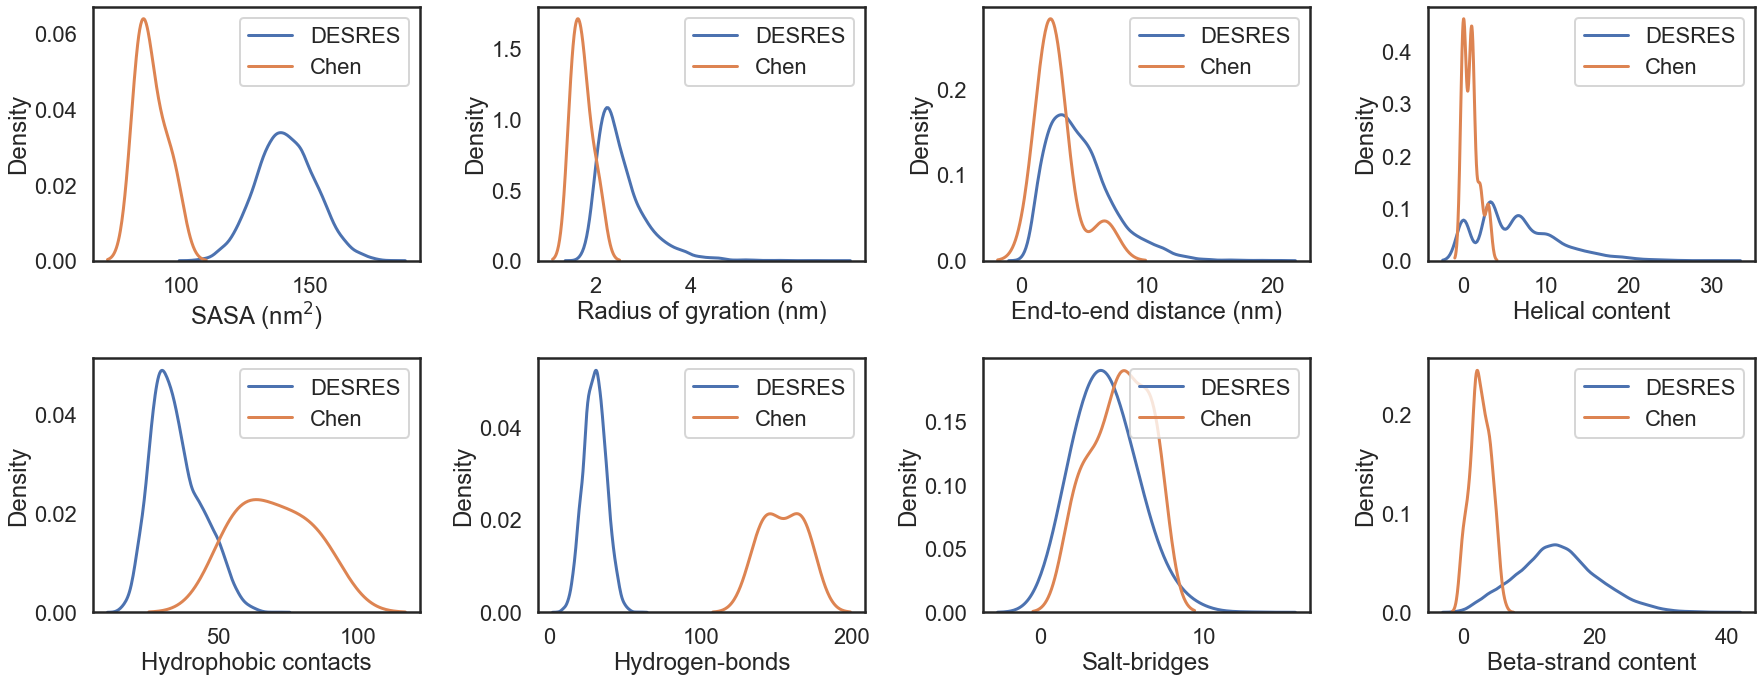

In [314]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10), sharex=False, sharey=False)
sns.set(style='white',context='poster',font_scale=1.0)
j=0

sns.kdeplot(feat[:,4], ax=axes[0,0], label="DESRES" ) #label="I"+str(j)
sns.kdeplot(np.sum(Chen_sasa,axis=1), ax=axes[0,0], label="Chen" ) #label="I"+str(j)

sns.kdeplot(feat[:,3], ax=axes[0,1], label="DESRES" )
sns.kdeplot(Chen_rg, ax=axes[0,1], label="Chen" ) #label="I"+str(j)

sns.kdeplot(feat[:,0], ax=axes[0,2], label="DESRES" )
sns.kdeplot(Chen_ee, ax=axes[0,2], label="Chen" )



sns.kdeplot(feat[:,2], ax=axes[1,0], label="DESRES"  )
sns.kdeplot(Chen_hc, ax=axes[1,0], label="Chen"  )



sns.kdeplot(feat[:,1], ax=axes[1,1], label="DESRES"  )
sns.kdeplot(Chen_hb, ax=axes[1,1], label="Chen" )



sns.kdeplot(feat[:,5], ax=axes[1,2],  bw_method=0.45, label="DESRES")

sns.kdeplot(np.sum(Chen_SB<0.45,axis=1), ax=axes[1,2],  bw_method=0.45, label="Chen")

sns.kdeplot(SS[:,[7,8,9]].sum(axis=1), ax=axes[0,3] , label="DESRES")
sns.kdeplot(Chen_helix, ax=axes[0,3], label="Chen" )

sns.kdeplot(SS[:,[3,4]].sum(axis=1), ax=axes[1,3] , label="DESRES" )
sns.kdeplot(Chen_strand, ax=axes[1,3], label="Chen" )



axes[0,0].set_xlabel(r'SASA (nm$^2$)')
axes[0,1].set_xlabel(r'Radius of gyration (nm)')
axes[0,2].set_xlabel(r'End-to-end distance (nm)')

axes[1,0].set_xlabel(r'Hydrophobic contacts')
axes[1,1].set_xlabel(r'Hydrogen-bonds')
axes[1,2].set_xlabel(r'Salt-bridges')

axes[0,3].set_xlabel(r'Helical content')
axes[1,3].set_xlabel(r'Beta-strand content')
    
for ax in axes.flatten():
    ax.legend(loc=1)  

fig.tight_layout()

#fig.suptitle("D. E. Shaw ensemble",x=0.5,y=1.015)

#plt.savefig("distribution1.pdf",dpi=300)

plt.show()




# End